In [ ]:
! pip install --upgrade --force-reinstall gx1convert

transform data:

In [ ]:
import gx1convert

files = [("V2_00001.dat", "V2_00001.hdr", "V2_00001.parquet"), 
         ("V10_0001.dat", "V10_0001.hdr", "V10_0001.parquet"),
         ("D0400001.dat", "D0400001.hdr", "D0400001.parquet",),
         ("D0600001.dat", "D0600001.hdr", "D0600001.parquet",),
         ("D0800001.dat", "D0800001.hdr", "D0800001.parquet",),
         ("V6_00001.dat", "V6_00001.hdr", "V6_00001.parquet",),
         ("V17_0001.dat", "V17_0001.hdr", "V17_0001.parquet",),
         ("V20_0001.dat", "V20_0001.hdr", "V20_0001.parquet",),
         ("V24_0001.dat", "V24_0001.hdr", "V24_0001.parquet",),
         ("V25a_001.dat", "V25a_001.hdr", "V25a_001.parquet",),
         ]

for (data, header, parquet) in files:
    print(data, header)
    gx1convert.gx1_to_parquet(f"data/{data}", f"data/{header}", f"data/{parquet}")

# Main part, Project 2

In [1]:
import polars as pl
import numpy as np
import wave


def read_parquet(filename: str) -> pl.DataFrame:
    df1 = pl.read_parquet(f"data/{filename}")
    df1 = df1.with_row_count().with_columns(
        (pl.col("row_nr").cast(pl.Float32) / 20000.0 * 1000000000.0).cast(pl.Time).alias("time"))
    df1 = df1.with_columns(
        (pl.col("row_nr").cast(pl.Float32) / 20000.0).cast(pl.Float64).alias("seconds"))
    return df1


def convert_series_to_wav(series: pl.Series, path: str):
    diff = (series.max() - series.min()) / 2.0
    normalized_data = (series / diff * 20000).cast(pl.Int16)
    bytes = normalized_data.to_numpy().tobytes()
    with wave.open(path, 'w') as wav_file:
        wav_file.setnchannels(1)  # mono
        wav_file.setsampwidth(2)  # 2 bytes = 16 bit
        wav_file.setframerate(20000)  # common sample rate
        wav_file.setnframes(len(normalized_data))
        wav_file.writeframes(bytes)


files = [
    ("D4", "D0400001.parquet",),
    ("D6", "D0600001.parquet",),
    ("D8", "D0800001.parquet",),
    ("V2", "V2_00001.parquet",),
    ("V6", "V6_00001.parquet",),
    ("V10", "V10_0001.parquet"),
    ("V17", "V17_0001.parquet"),
    ("V20", "V20_0001.parquet"),
    ("V24", "V24_0001.parquet"),
    ("V25", "V25a_001.parquet"),
]


rename_d_columns = {
    "CH1_Moment": "moment",
    "CH2_Kraft": "force",
    "CH4_SyncSig": "sync signal",
    "CH5_a3_BOZA": "oil acceleration",
    "CH6_akustik": "acoustic",
    "CH3_Biegemo": "bending moment", # different
    'CH7_a4_Bohrst': "bohrst", # different
}

rename_v_columns = {
    "CH1_Moment": "moment",
    "CH2_Kraft": "force",
    "CH3_SyncSig": "sync signal",
    "CH7_a3_BOZA": "oil acceleration",
    "CH4_akustik": "acoustic",
    "CH5_a1_WSAS": "lateral acceleration", # different
    "CH6_a2_WSAF": "frontal acceleration", # different

}

dfs = {}

for (name, parquet_path) in files:
    df = read_parquet(parquet_path)
    if name[0] == "D":
        df = df.rename(rename_d_columns)
    else:
        df = df.rename(rename_v_columns)
    convert_series_to_wav(df["acoustic"], f"data/{name}.wav")
    lower_name = name.lower()
    dfs[lower_name] = df
    exec(f"{lower_name} = df")



# define the dataframes again because pylance too stupid to pick up the exec above
d4: pl.DataFrame = d4
d6: pl.DataFrame = d6
d8: pl.DataFrame = d8
v2: pl.DataFrame = v2
v6: pl.DataFrame = v6
v10: pl.DataFrame = v10
v17: pl.DataFrame = v17
v20: pl.DataFrame = v20
v24: pl.DataFrame = v24
v25: pl.DataFrame = v25

In [2]:
v17

shape: (5_689_690, 10)
┌─────────┬─────────┬────────────┬───────────┬───┬────────────┬────────────┬───────────┬───────────┐
│ row_nr  ┆ moment  ┆ force      ┆ sync      ┆ … ┆ frontal    ┆ oil accele ┆ time      ┆ seconds   │
│ ---     ┆ ---     ┆ ---        ┆ signal    ┆   ┆ accelerati ┆ ration     ┆ ---       ┆ ---       │
│ u32     ┆ f32     ┆ f32        ┆ ---       ┆   ┆ on         ┆ ---        ┆ time      ┆ f64       │
│         ┆         ┆            ┆ f32       ┆   ┆ ---        ┆ f32        ┆           ┆           │
│         ┆         ┆            ┆           ┆   ┆ f32        ┆            ┆           ┆           │
╞═════════╪═════════╪════════════╪═══════════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
│ 0       ┆ 12.584  ┆ -92.987999 ┆ 11.5464   ┆ … ┆ -1.9056    ┆ 0.38       ┆ 00:00:00  ┆ 0.0       │
│ 1       ┆ -1.3068 ┆ -39.032001 ┆ 11.5456   ┆ … ┆ -2.5024    ┆ 1.75       ┆ 00:00:00. ┆ 0.00005   │
│         ┆         ┆            ┆           ┆   ┆            ┆            ┆ 000050    ┆           │
│ 2       ┆ -6.1468 ┆ 45.919998  ┆ 11.5464   ┆ … ┆ -1.9144    ┆ 0.25       ┆ 00:00:00. ┆ 0.0001    │
│         ┆         ┆            ┆           ┆   ┆            ┆            ┆ 000100    ┆           │
│ 3       ┆ 2.42    ┆ -6.888     ┆ 11.547999 ┆ … ┆ 1.3664     ┆ 2.5        ┆ 00:00:00. ┆ 0.00015   │
│         ┆         ┆            ┆           ┆   ┆            ┆            ┆ 000150    ┆           │
│ …       ┆ …       ┆ …          ┆ …         ┆ … ┆ …          ┆ …          ┆ …         ┆ …         │
│ 5689686 ┆ -0.1452 ┆ -603.84802 ┆ 11.5624   ┆ … ┆ 0.6184     ┆ 0.62       ┆ 00:04:44. ┆ 284.48431 │
│         ┆         ┆ 2          ┆           ┆   ┆            ┆            ┆ 484304896 ┆ 4         │
│ 5689687 ┆ 1.694   ┆ -704.87200 ┆ 11.5392   ┆ … ┆ 0.7872     ┆ 2.49       ┆ 00:04:44. ┆ 284.48434 │
│         ┆         ┆ 9          ┆           ┆   ┆            ┆            ┆ 484337664 ┆ 4         │
│ 5689688 ┆ 1.1132  ┆ -539.55999 ┆ 11.554399 ┆ … ┆ -0.0728    ┆ 1.3        ┆ 00:04:44. ┆ 284.48440 │
│         ┆         ┆ 8          ┆           ┆   ┆            ┆            ┆ 484403200 ┆ 6         │
│ 5689689 ┆ 1.9844  ┆ -653.21197 ┆ 11.587999 ┆ … ┆ -0.2192    ┆ 0.82       ┆ 00:04:44. ┆ 284.48443 │
│         ┆         ┆ 5          ┆           ┆   ┆            ┆            ┆ 484435968 ┆ 6         │
└─────────┴─────────┴────────────┴───────────┴───┴────────────┴────────────┴───────────┴───────────┘

look at all the header files:

```
| df  | filename           | comments                                                                   | columns                                                                                  |
| --- | ------------------ | -------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------- |
| d4  | "D0400001.parquet" | vc=111m/min, f=0.231mm, Dämpfer 1240 mm von Einspannung, DiffDruck: 12 bar | CH1_Moment, CH2_Kraft, CH3_Biegemo, CH4_SyncSig, CH5_a3_BOZA, CH6_akustik, CH7_a4_Bohrst |
| d6  | "D0600001.parquet" | vc=120m/min, f=0.185mm, Dämpfer 1240 mm von Einspannung, DiffDruck: 12 bar | CH1_Moment, CH2_Kraft, CH3_Biegemo, CH4_SyncSig, CH5_a3_BOZA, CH6_akustik, CH7_a4_Bohrst |
| d8  | "D0800001.parquet" | vc=90m/min, f=0.250mm, Dämpfer 1240 mm von Einspannung, DiffDruck: 12 bar  | CH1_Moment, CH2_Kraft, CH3_Biegemo, CH4_SyncSig, CH5_a3_BOZA, CH6_akustik, CH7_a4_Bohrst |
| v2  | "V2_00001.parquet" | vc=120 mm/min, f=0.185                                                     | CH1_Moment, CH2_Kraft, CH3_SyncSig, CH4_akustik, CH5_a1_WSAS, CH6_a2_WSAF, CH7_a3_BOZA   |
| v6  | "V6_00001.parquet" | Schneiden 2, v_c=111 m/min, f=0.231 mm, V_oel=371 l/min                    | CH1_Moment, CH2_Kraft, CH3_SyncSig, CH4_akustik, CH5_a1_WSAS, CH6_a2_WSAF, CH7_a3_BOZA   |
| v10 | "V10_0001.parquet" | Schneiden 4, v_c=111 m/min, f=0.231 mm, V_oel=229 l/min                    | CH1_Moment, CH2_Kraft, CH3_SyncSig, CH4_akustik, CH5_a1_WSAS, CH6_a2_WSAF, CH7_a3_BOZA   |
| v17 | "V17_0001.parquet" | Schneiden 6, v_c=120 m/min, f=0.185 mm, V_oel=300 l/min                    | CH1_Moment, CH2_Kraft, CH3_SyncSig, CH4_akustik, CH5_a1_WSAS, CH6_a2_WSAF, CH7_a3_BOZA   |
| v20 | "V20_0001.parquet" | Schneiden 8, v_c=90 m/min, f=0.250 mm, V_oel=300 l/min                     | CH1_Moment, CH2_Kraft, CH3_SyncSig, CH4_akustik, CH5_a1_WSAS, CH6_a2_WSAF, CH7_a3_BOZA   |
| v24 | "V24_0001.parquet" | Schneiden 12, v_c=120 m/min, f=0.185 mm, V_oel=300 l/min                   | CH1_Moment, CH2_Kraft, CH3_SyncSig, CH4_akustik, CH5_a1_WSAS, CH6_a2_WSAF, CH7_a3_BOZA   |
| v25 | "V25a_001.parquet" | Schneiden 13, v_c=120 m/min, f=0.185 mm, V_oel=300 l/min                   | CH1_Moment, CH2_Kraft, CH3_SyncSig, CH4_akustik, CH5_a1_WSAS, CH6_a2_WSAF, CH7_a3_BOZA   |
```


now listen to audio manually to see if we can hear the chatter coming at some point. Then note these values down:

```
d4, d6, d8 had no chatter.

v2:  0:10 normal   3:20.25  chatter                                                     4:24 end
v6                 0:47.40  first chatter                         2:16 second chatter   4:13 end
v10                0:47.35  first chatter                         1:31 second chatter   4:12 end
v17                0:34.50  first chatter                         0:45 second cahtter   4:30 end
v20                0:52.50  first chatter   1:36 almost normal    1:47 second chatter   4:47 end
v24                0:21.60  first chatter                         1:04 second chatter   4:18 end
v25                1:58.50  chatter                                                     4:20 end
```


In [3]:
from matplotlib.axes import Axes
from matplotlib.figure import Figure
import numpy as np
import matplotlib.pyplot as plt

regions = {
    "d4": [("no chatter", 3, 222)],
    "d6": [("no chatter", 2, 254)],
    "d8": [("no chatter", 4, 254)],
    "v2": [("no chatter", 10, 200), ("chatter", 200, 264)],
    "v6": [("no chatter", 31, 47), ("chatter", 47, 136), ("low chatter", 136, 253)],
    "v10": [("no chatter", 31, 47), ("chatter", 47, 91), ("low chatter", 91, 252)],
    "v17": [("no chatter", 16, 35), ("chatter", 35, 45), ("low chatter", 45, 270)],
    "v20": [("no chatter", 33, 52), ("chatter", 52, 136), ("low chatter", 136, 287)],
    "v24": [("no chatter", 3, 22), ("chatter", 22, 64), ("low chatter", 64, 258)],
    "v25": [("no chatter", 5, 118), ("chatter", 118, 260)],
}


def add_regions(df_name, fig: Figure, ax: Axes):
    reg: list[(str, int, int)] = regions[df_name]
    for (name, start, end) in reg:
        color =  {"chatter": "red", "low chatter": "orange", "no chatter": "grey"}[name]
        ax.axvspan(start, end, color=color, alpha=0.3, label=name)


d4: 03:54
d6: 04:28
d8: 04:27
v2: 04:51
v6: 04:25
v10: 04:25
v17: 04:44
v20: 04:58
v24: 04:29
v25: 04:33


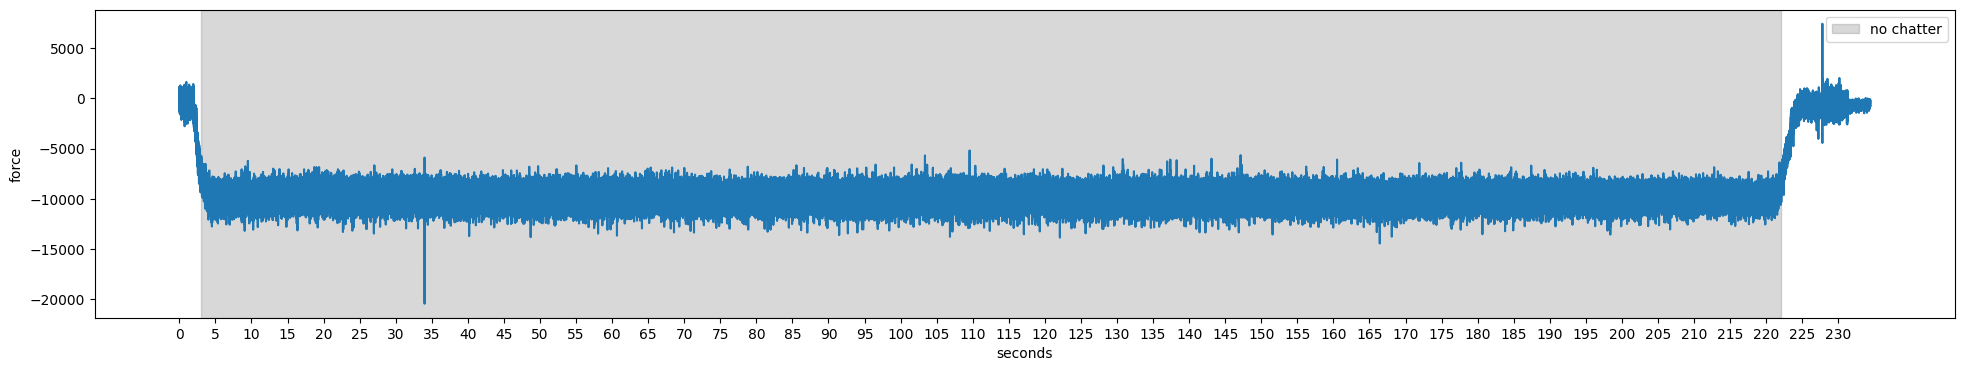

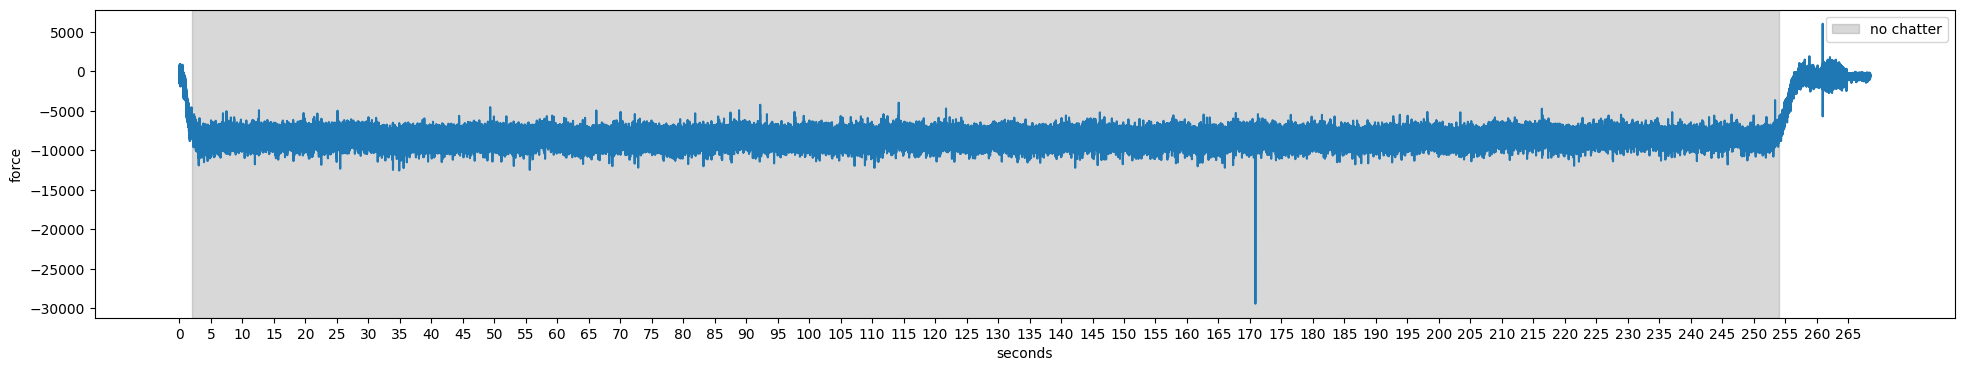

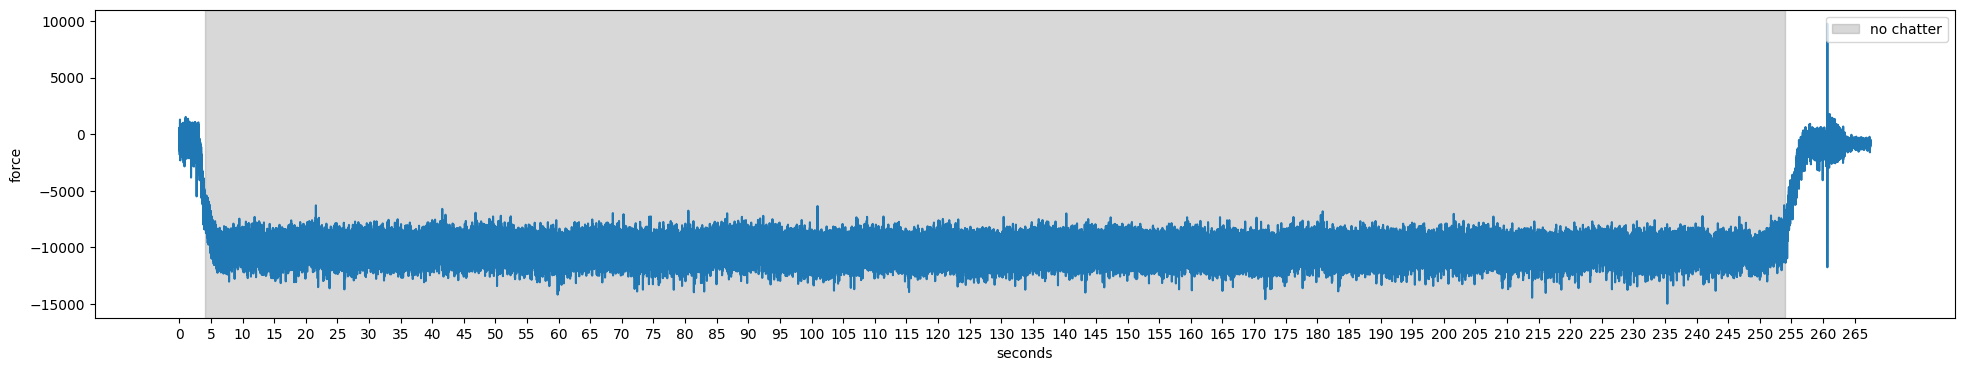

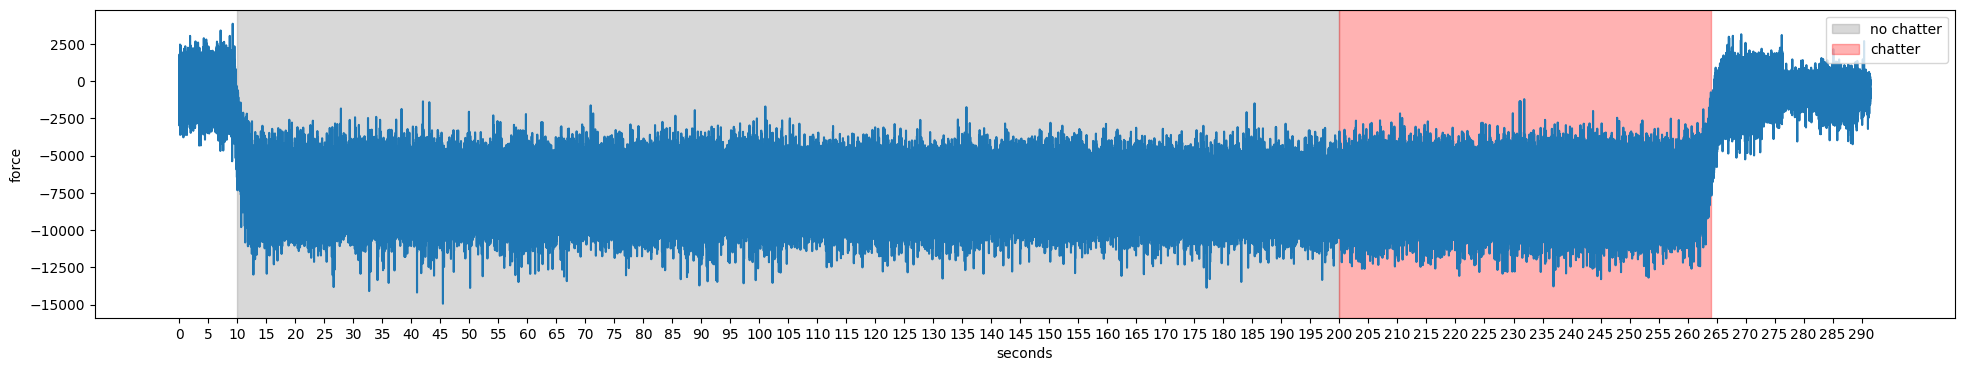

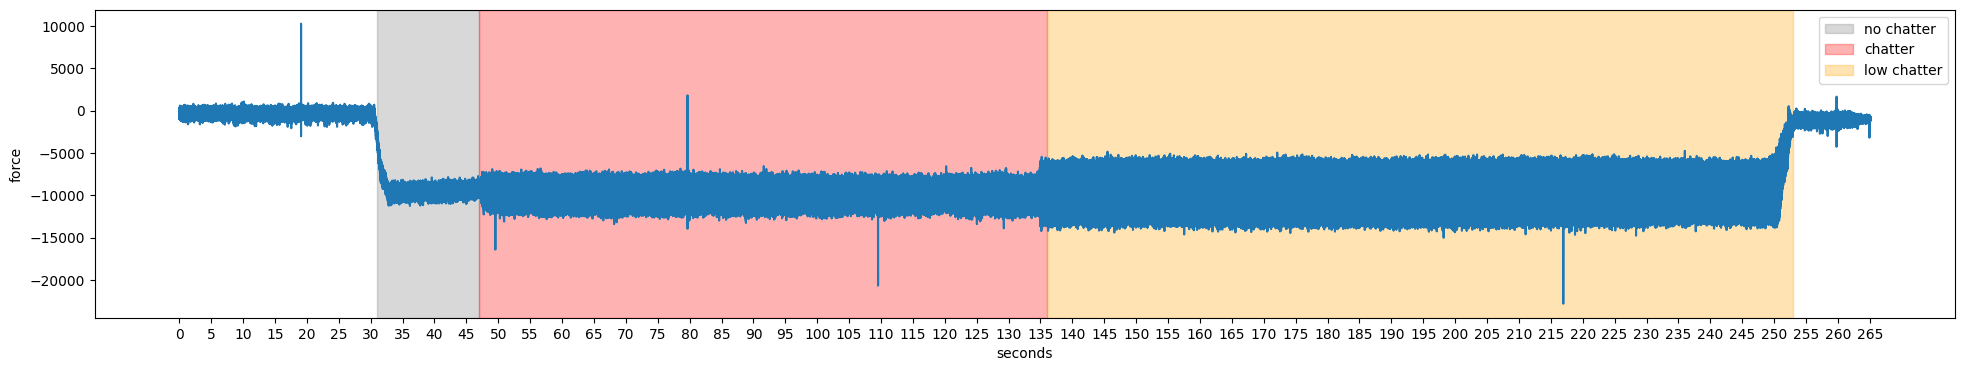

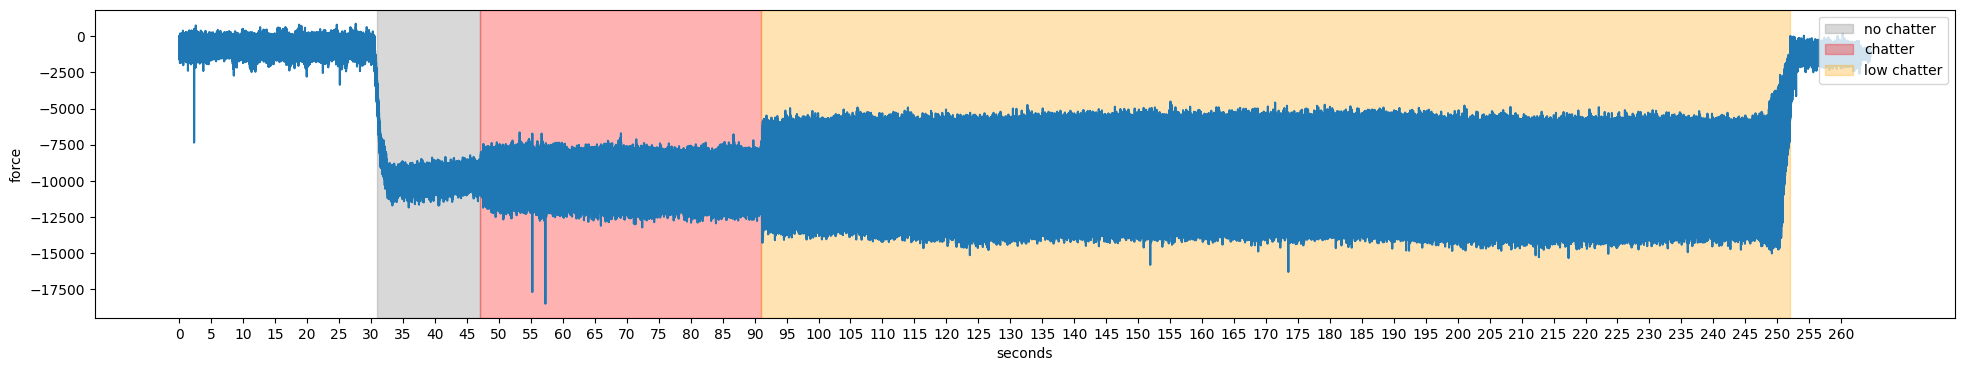

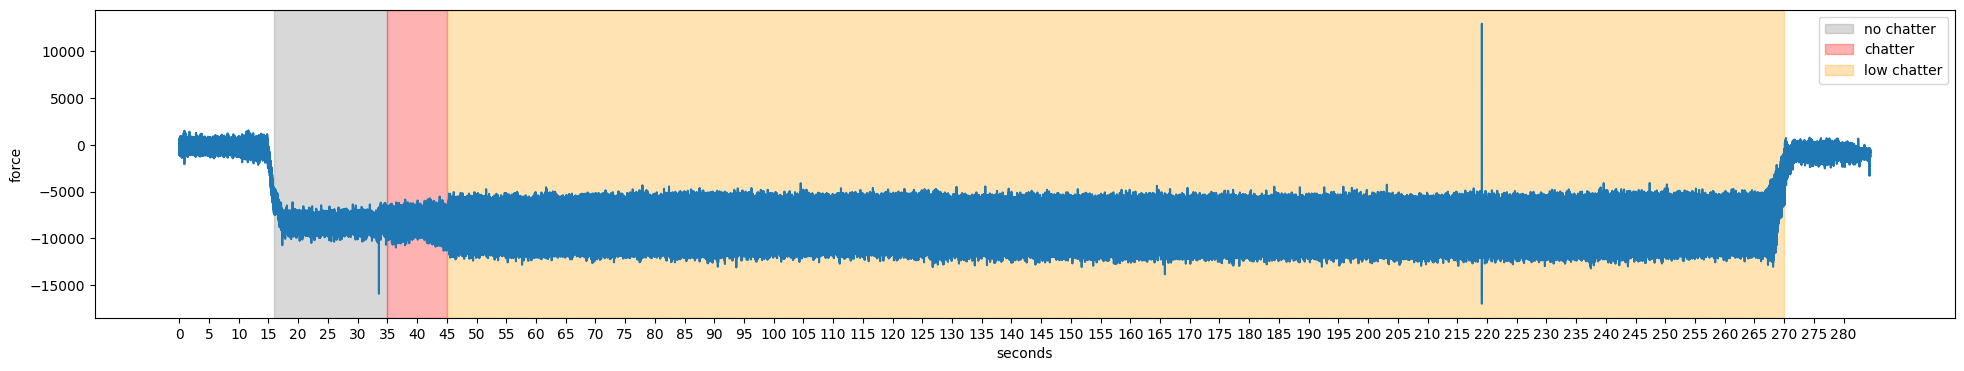

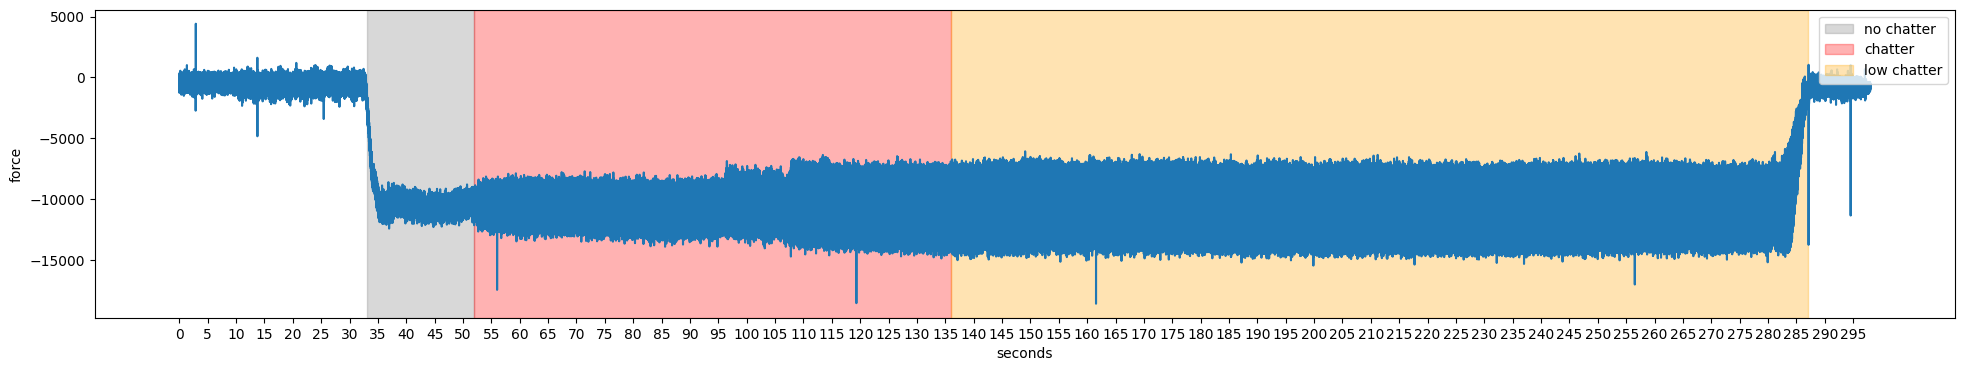

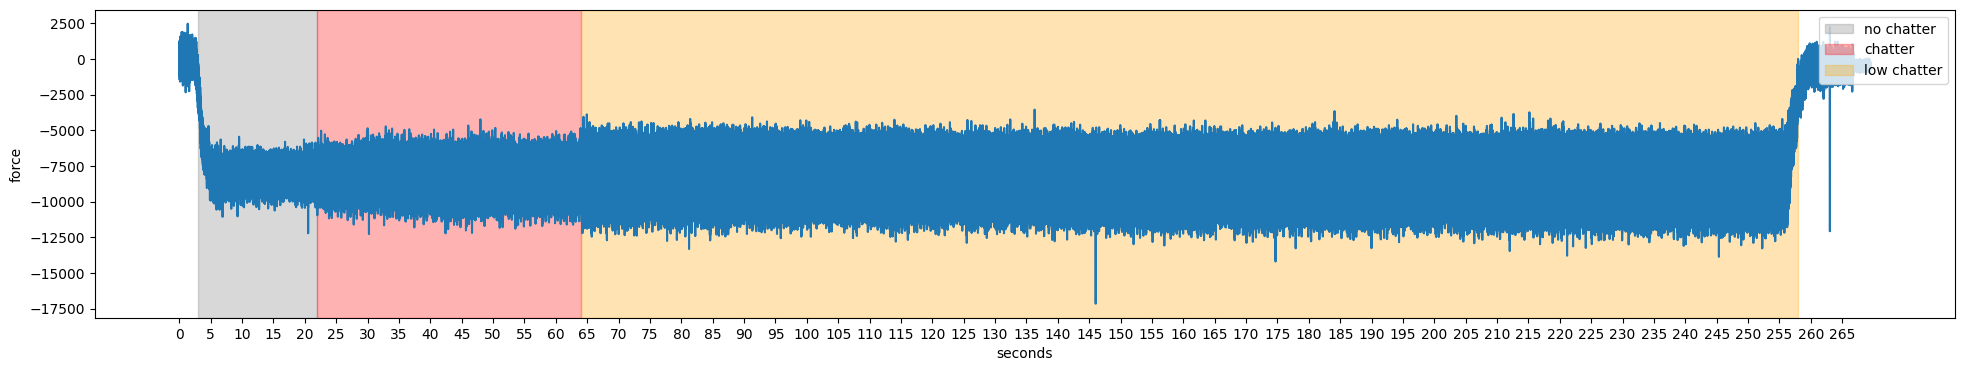

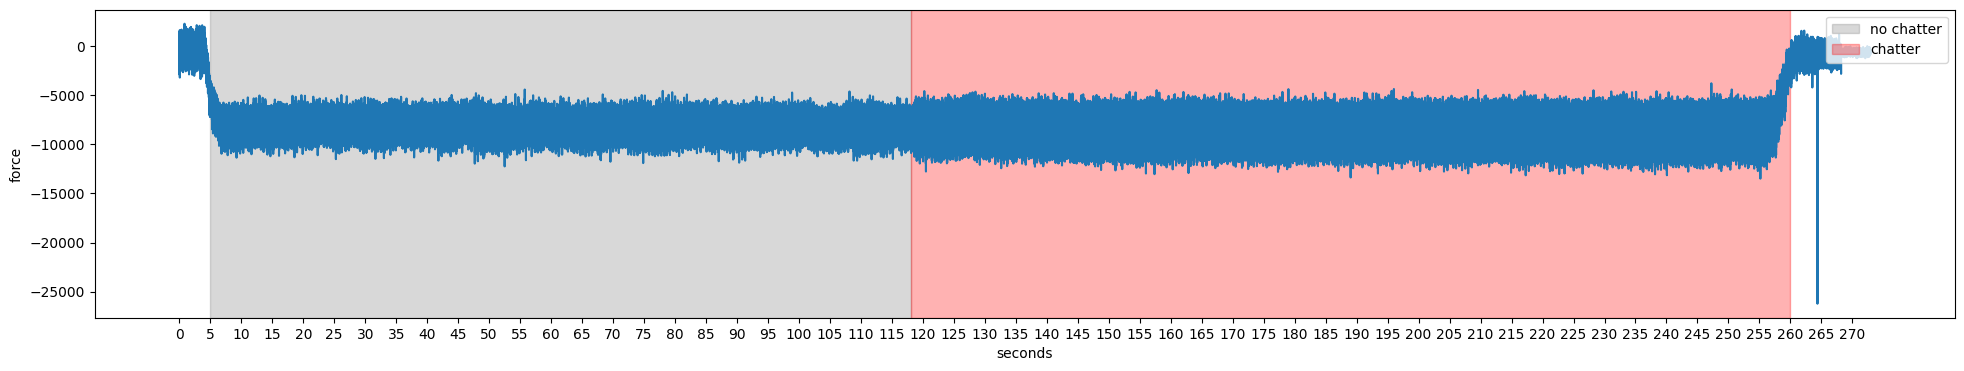

In [4]:


for name in dfs:
    seconds = dfs[name].__len__()/20000
    # print the seconds as a formatted duration
    print(f"{name}: {seconds//60:02.0f}:{seconds%60:02.0f}")

for name in dfs:
    # plot the force:
    df = dfs[name]
    fig, ax = plt.subplots(figsize=(24, 4))
    # plot the seconds on the x axis of ax
    ax.plot(df["seconds"], df["force"])
    ax.set_xlabel("seconds")
    ax.set_ylabel("force")
    ax.set_xticks(np.arange(0, df["seconds"].max(), 5))

    add_regions(name, fig, ax)
    ax.legend(loc="upper right")       
    plt.show()


In [5]:
for name in dfs:
    seconds = dfs[name].__len__()/20000
    # print the seconds as a formatted duration
    print(f"{name}:    {seconds//1}")

d4:    234.0
d6:    268.0
d8:    267.0
v2:    291.0
v6:    265.0
v10:    264.0
v17:    284.0
v20:    298.0
v24:    269.0
v25:    272.0


<Figure size 1920x1440 with 0 Axes>

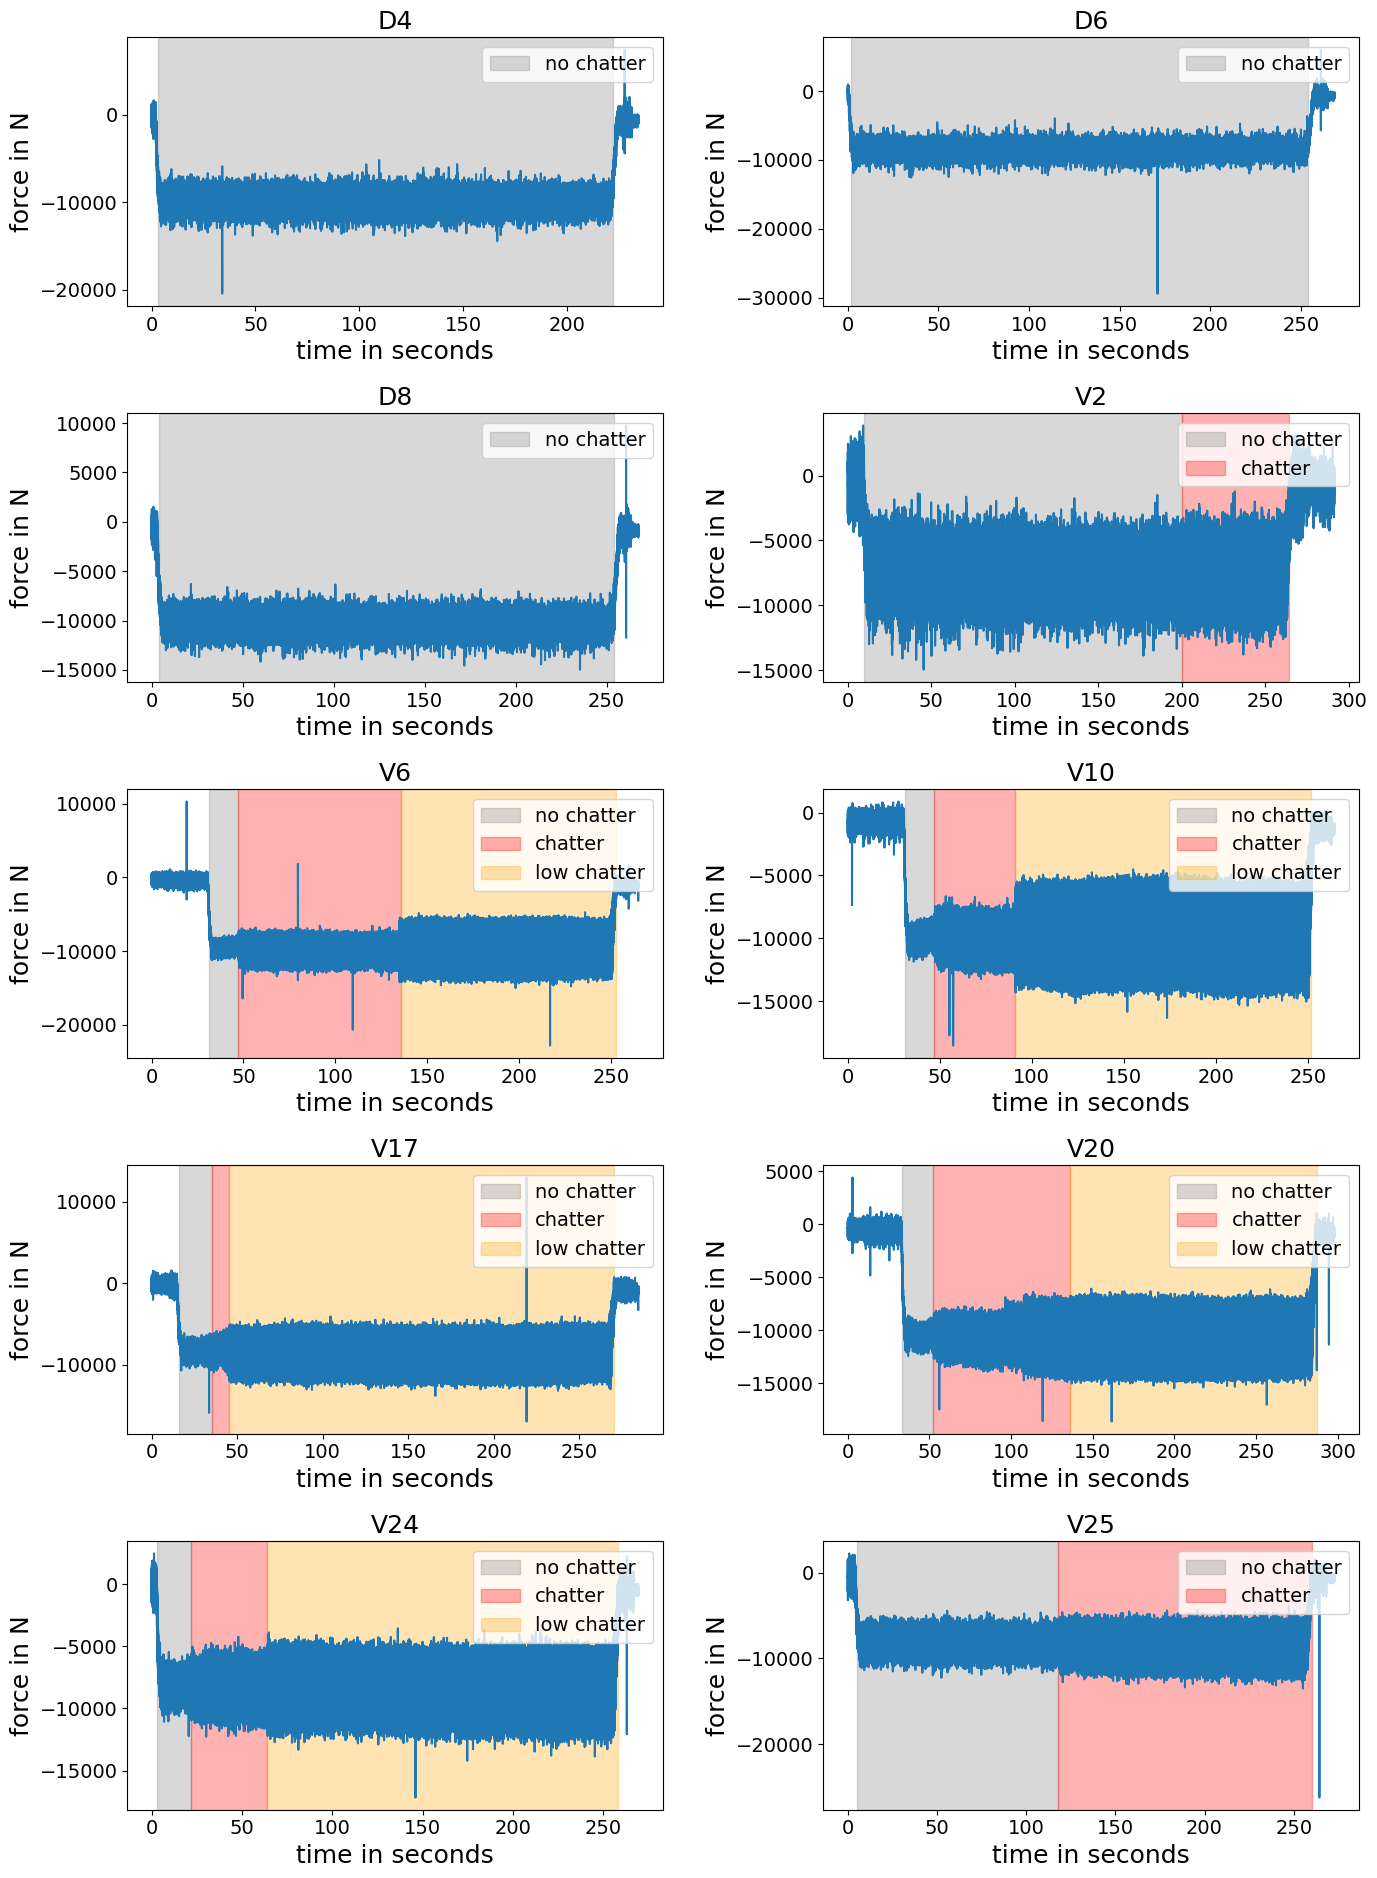

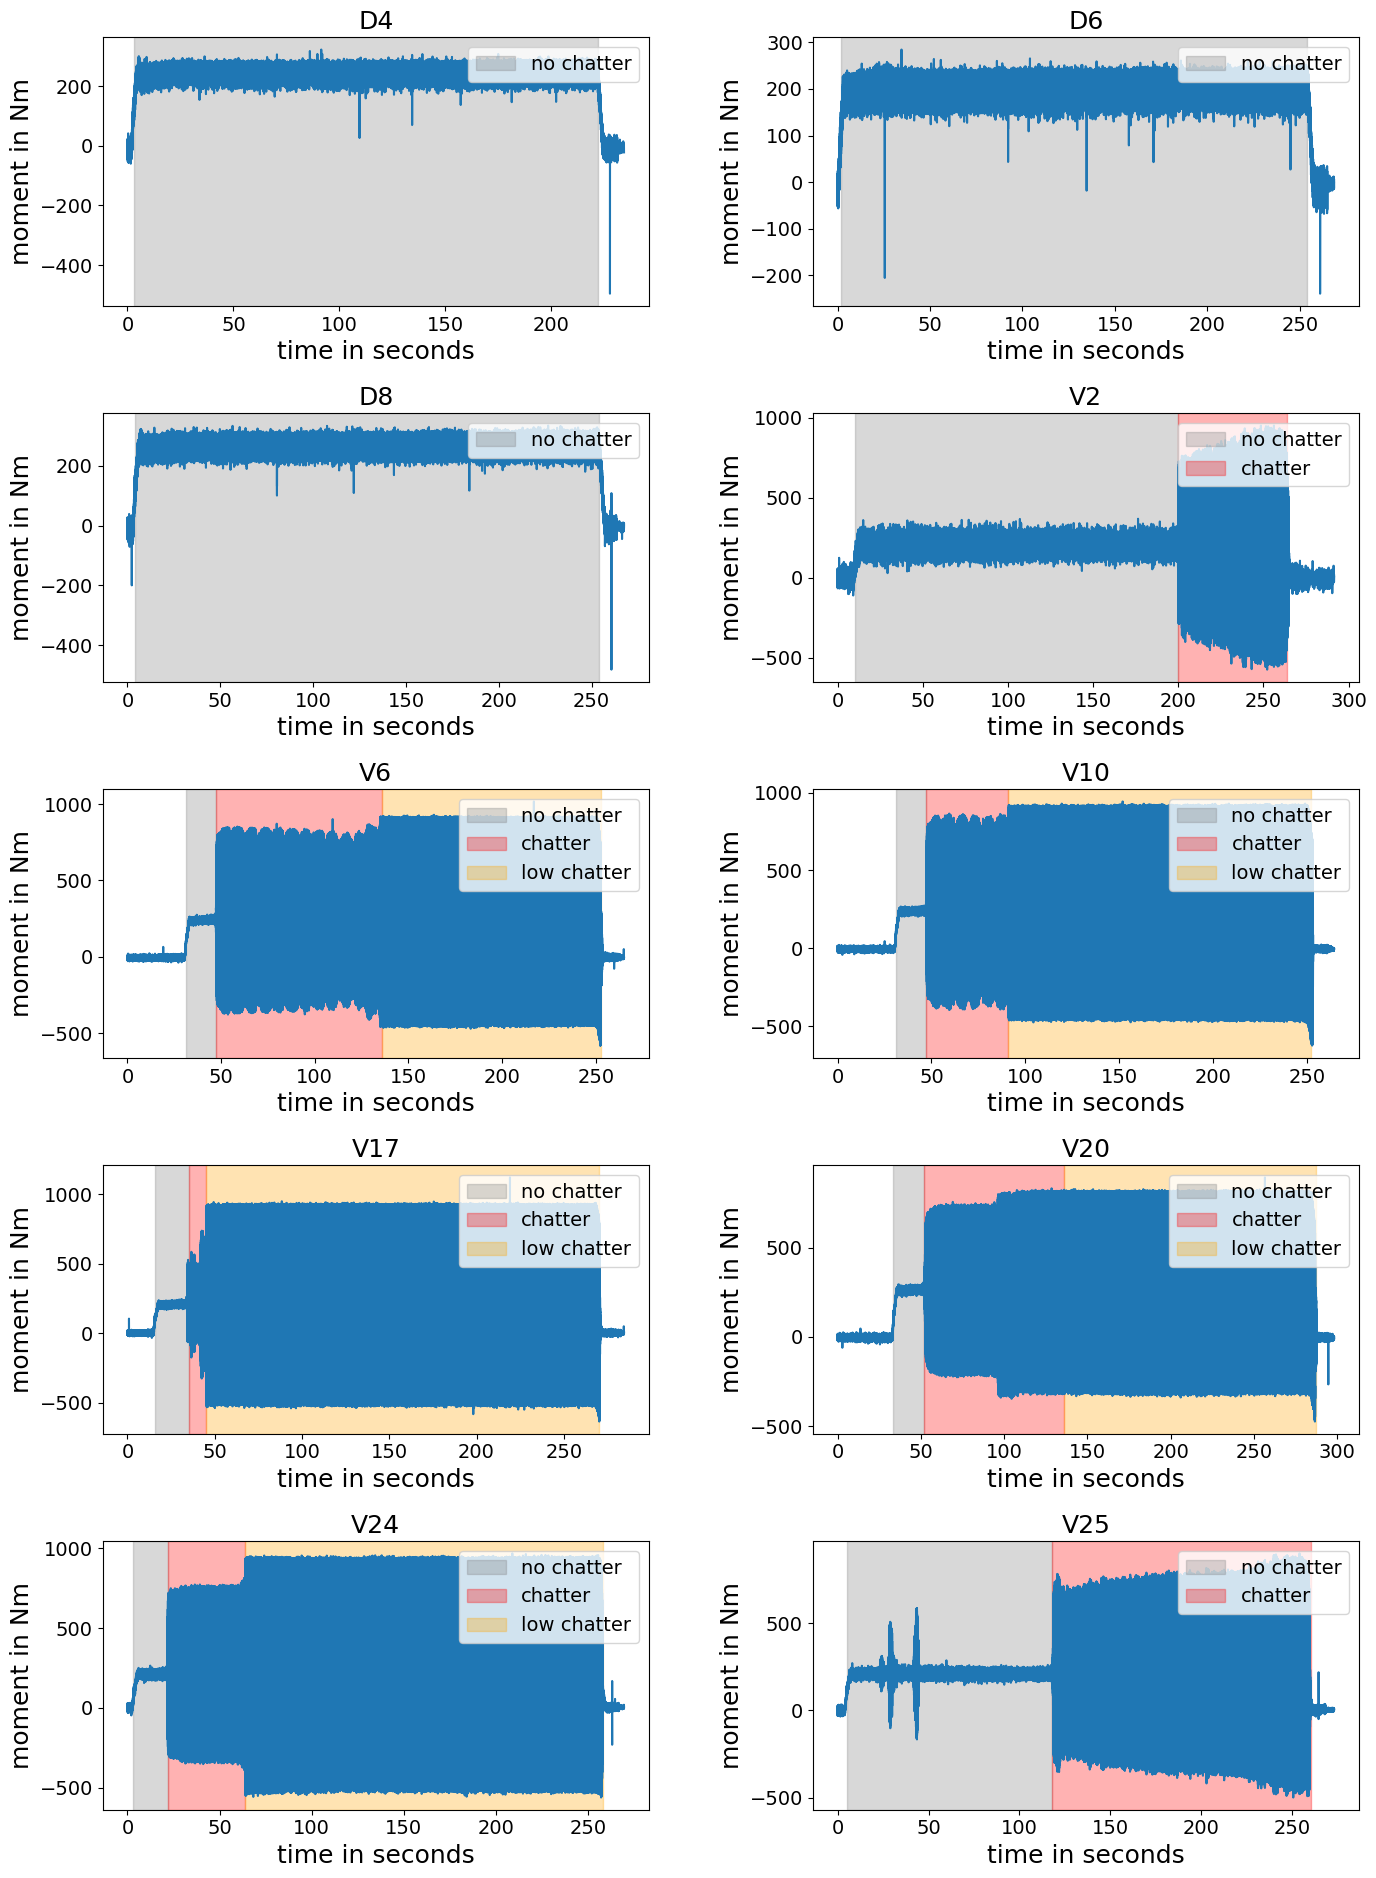

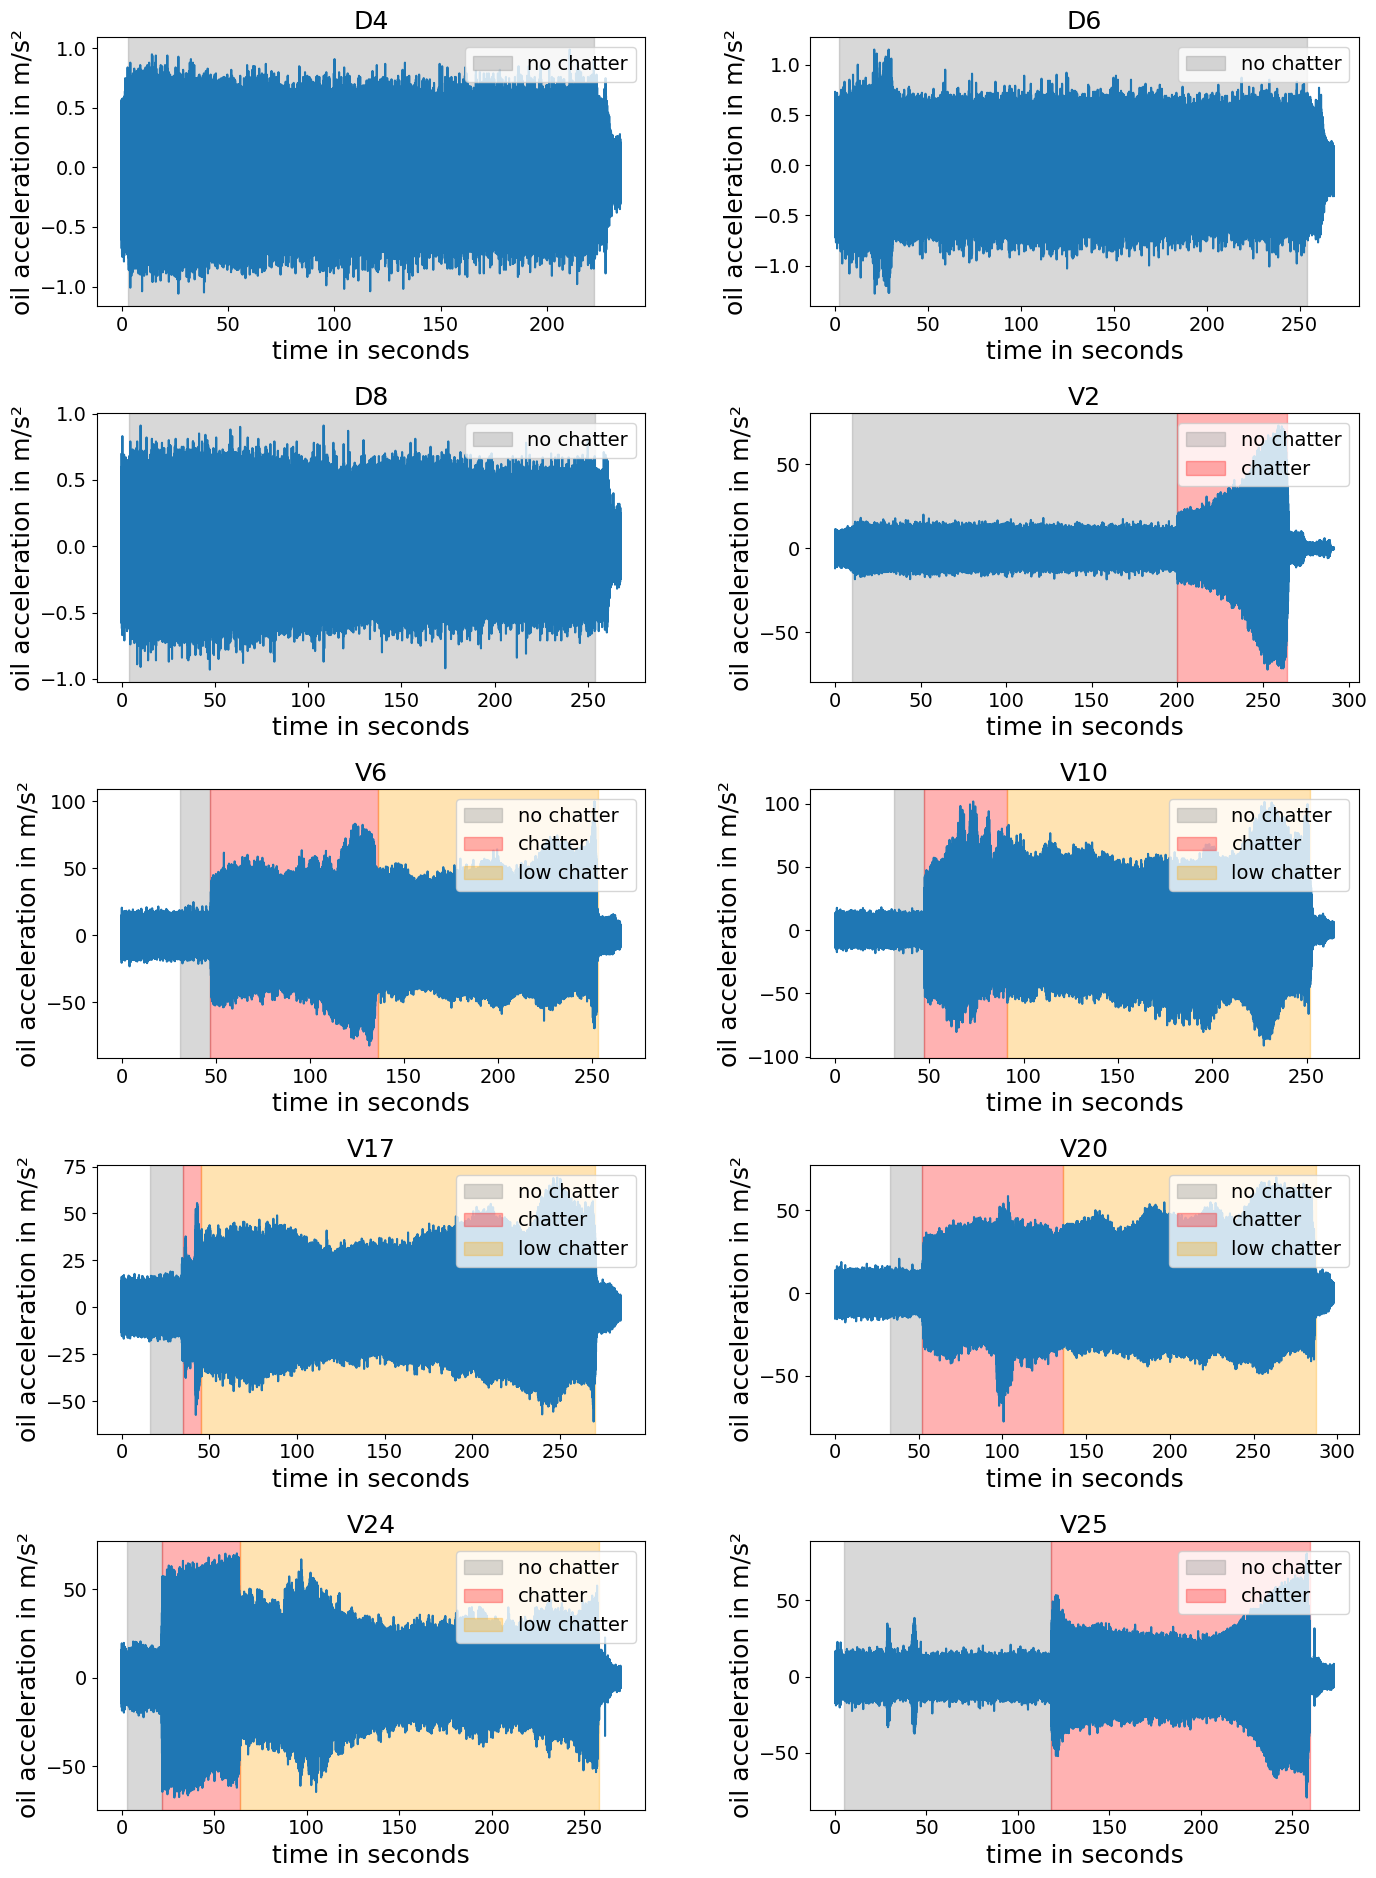

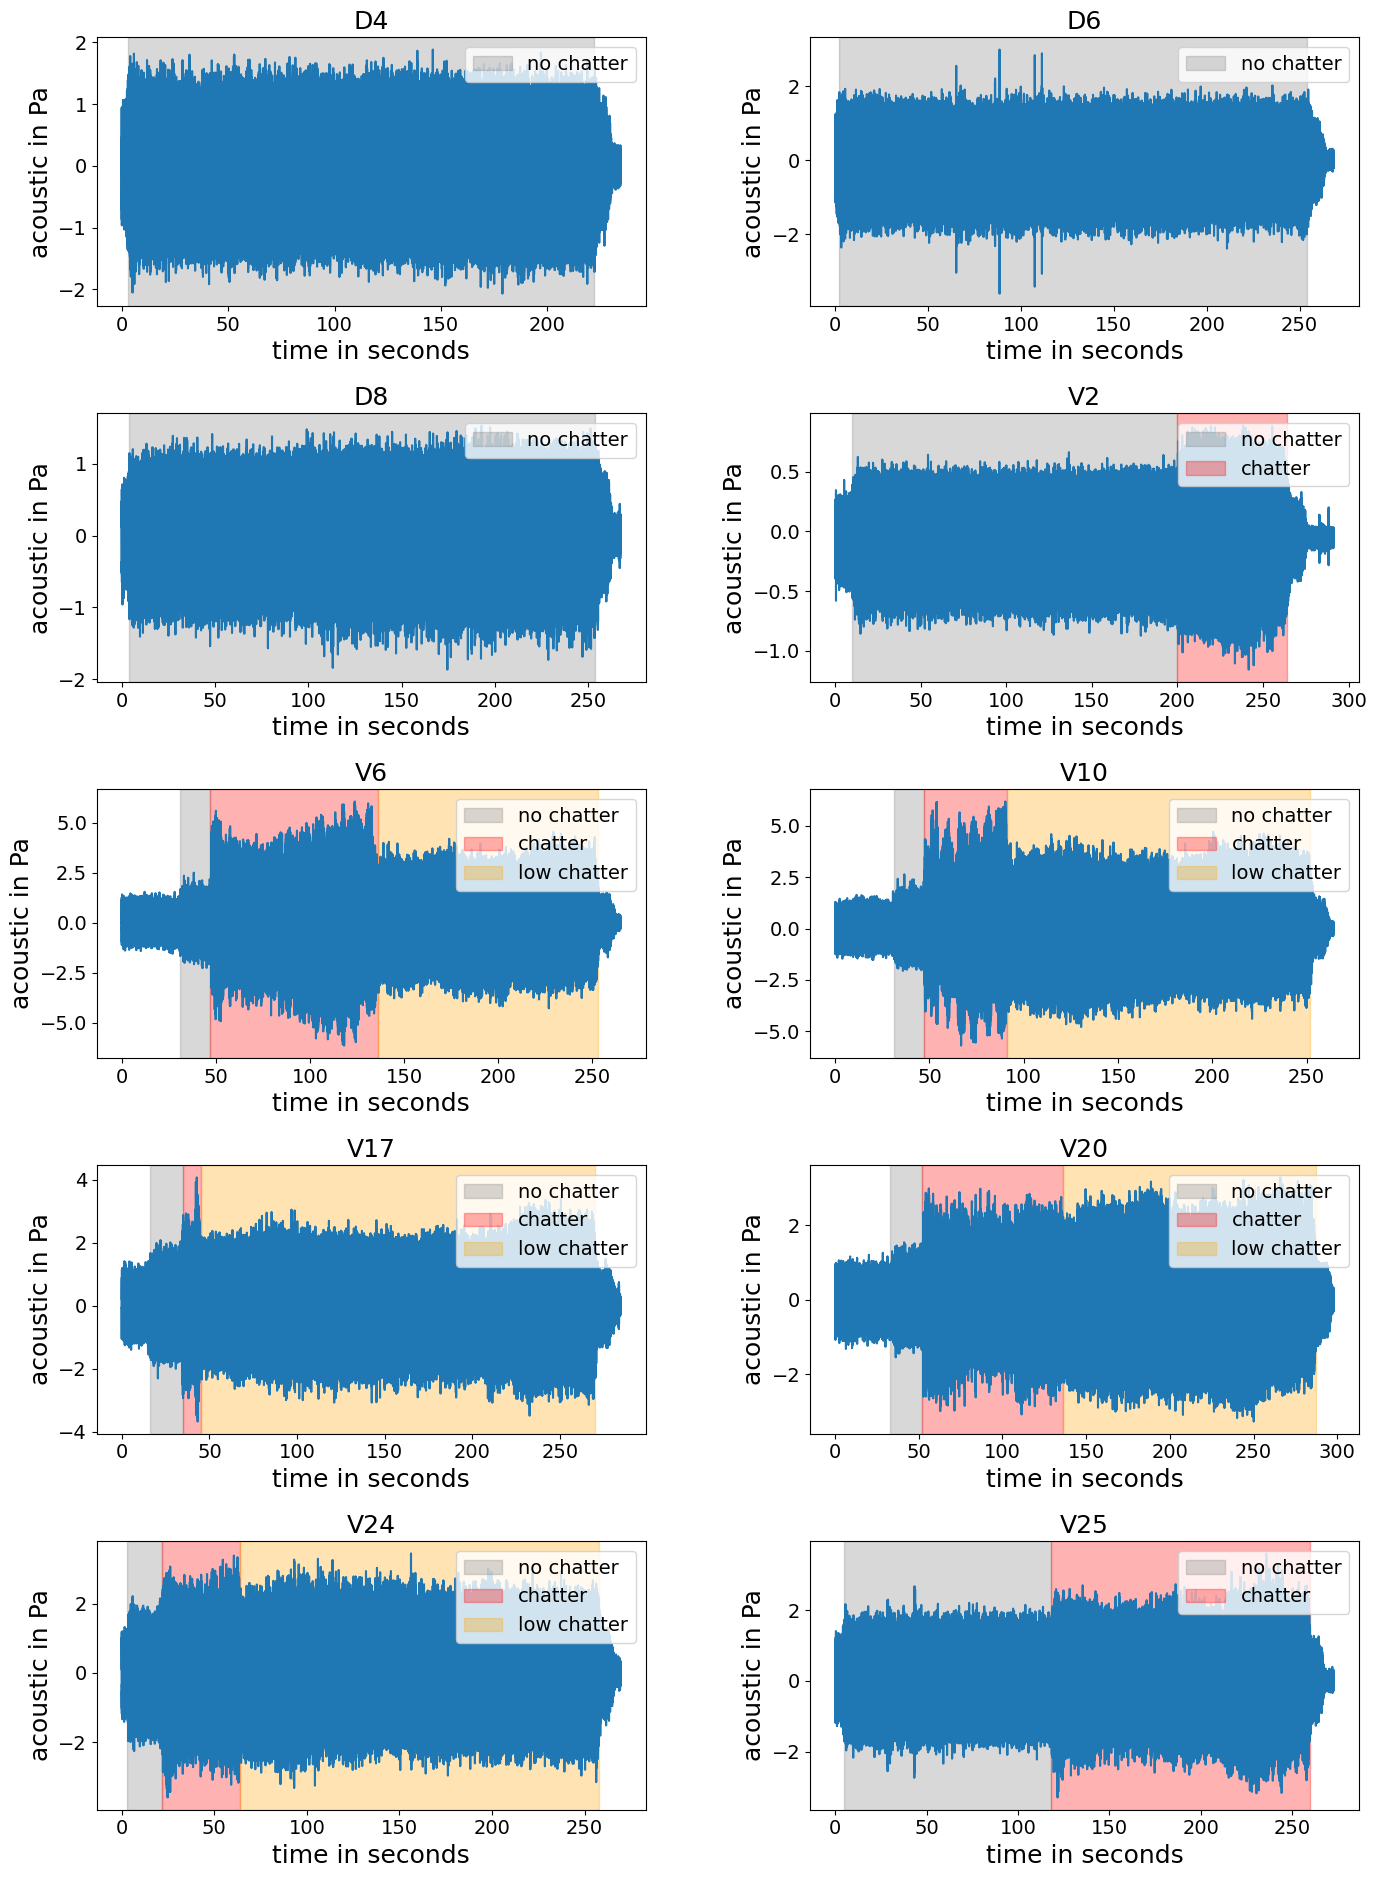

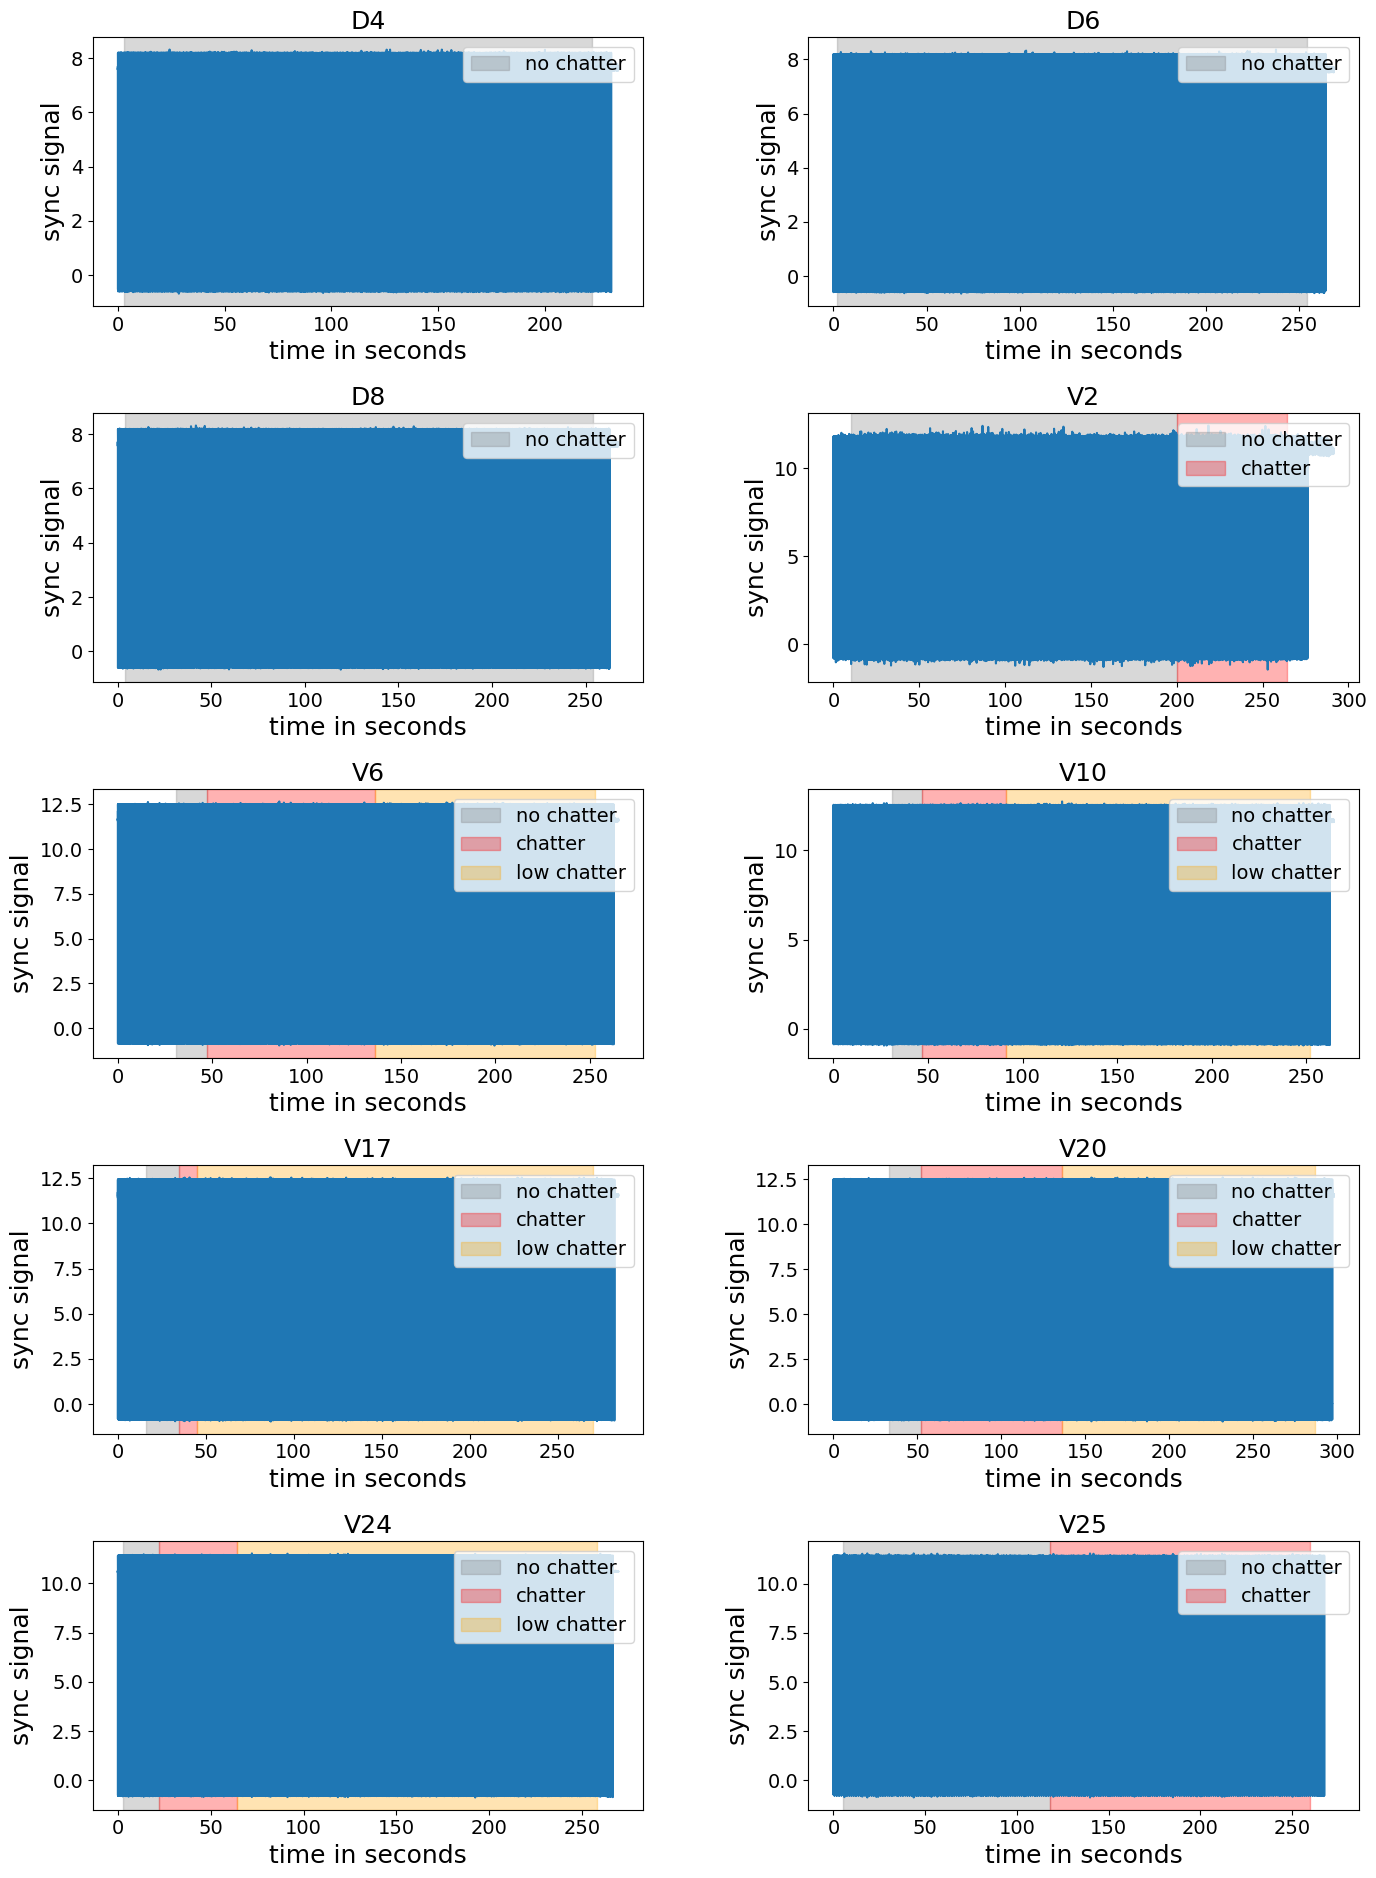

In [8]:
plt.gcf().set_dpi(300)
plt.rcParams.update({'font.size': 14})
def plot_all_time_series_with_segments(column: str, y_label: str):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 19))
    df_by_idx = { 0: "d4", 1: "d6", 2: "d8", 3: "v2", 4: "v6", 5: "v10", 6: "v17", 7: "v20", 8: "v24", 9: "v25"}
    for x in range(2):
        for y in range(5):
            idx = x + y*2
            df_name = df_by_idx[idx]
            df = dfs[df_name]
            ax: Axes = axes[y,x]
            ax.plot(df["seconds"], df[column])
            ax.set_title(df_name.upper(), fontsize=18)
            ax.set_xlabel("time in seconds", fontsize=18)
            ax.set_ylabel(y_label, fontsize=18)
            add_regions(df_name, fig, ax)
            ax.legend(loc="upper right")
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3, hspace=0.4)
    plt.savefig(f"plots/all-{column}.png")
    plt.show()

plot_all_time_series_with_segments("force", "force in N")
plot_all_time_series_with_segments("moment", "moment in Nm")
plot_all_time_series_with_segments("oil acceleration", "oil acceleration in m/s²")
plot_all_time_series_with_segments("acoustic", "acoustic in Pa")
plot_all_time_series_with_segments("sync signal", "sync signal")

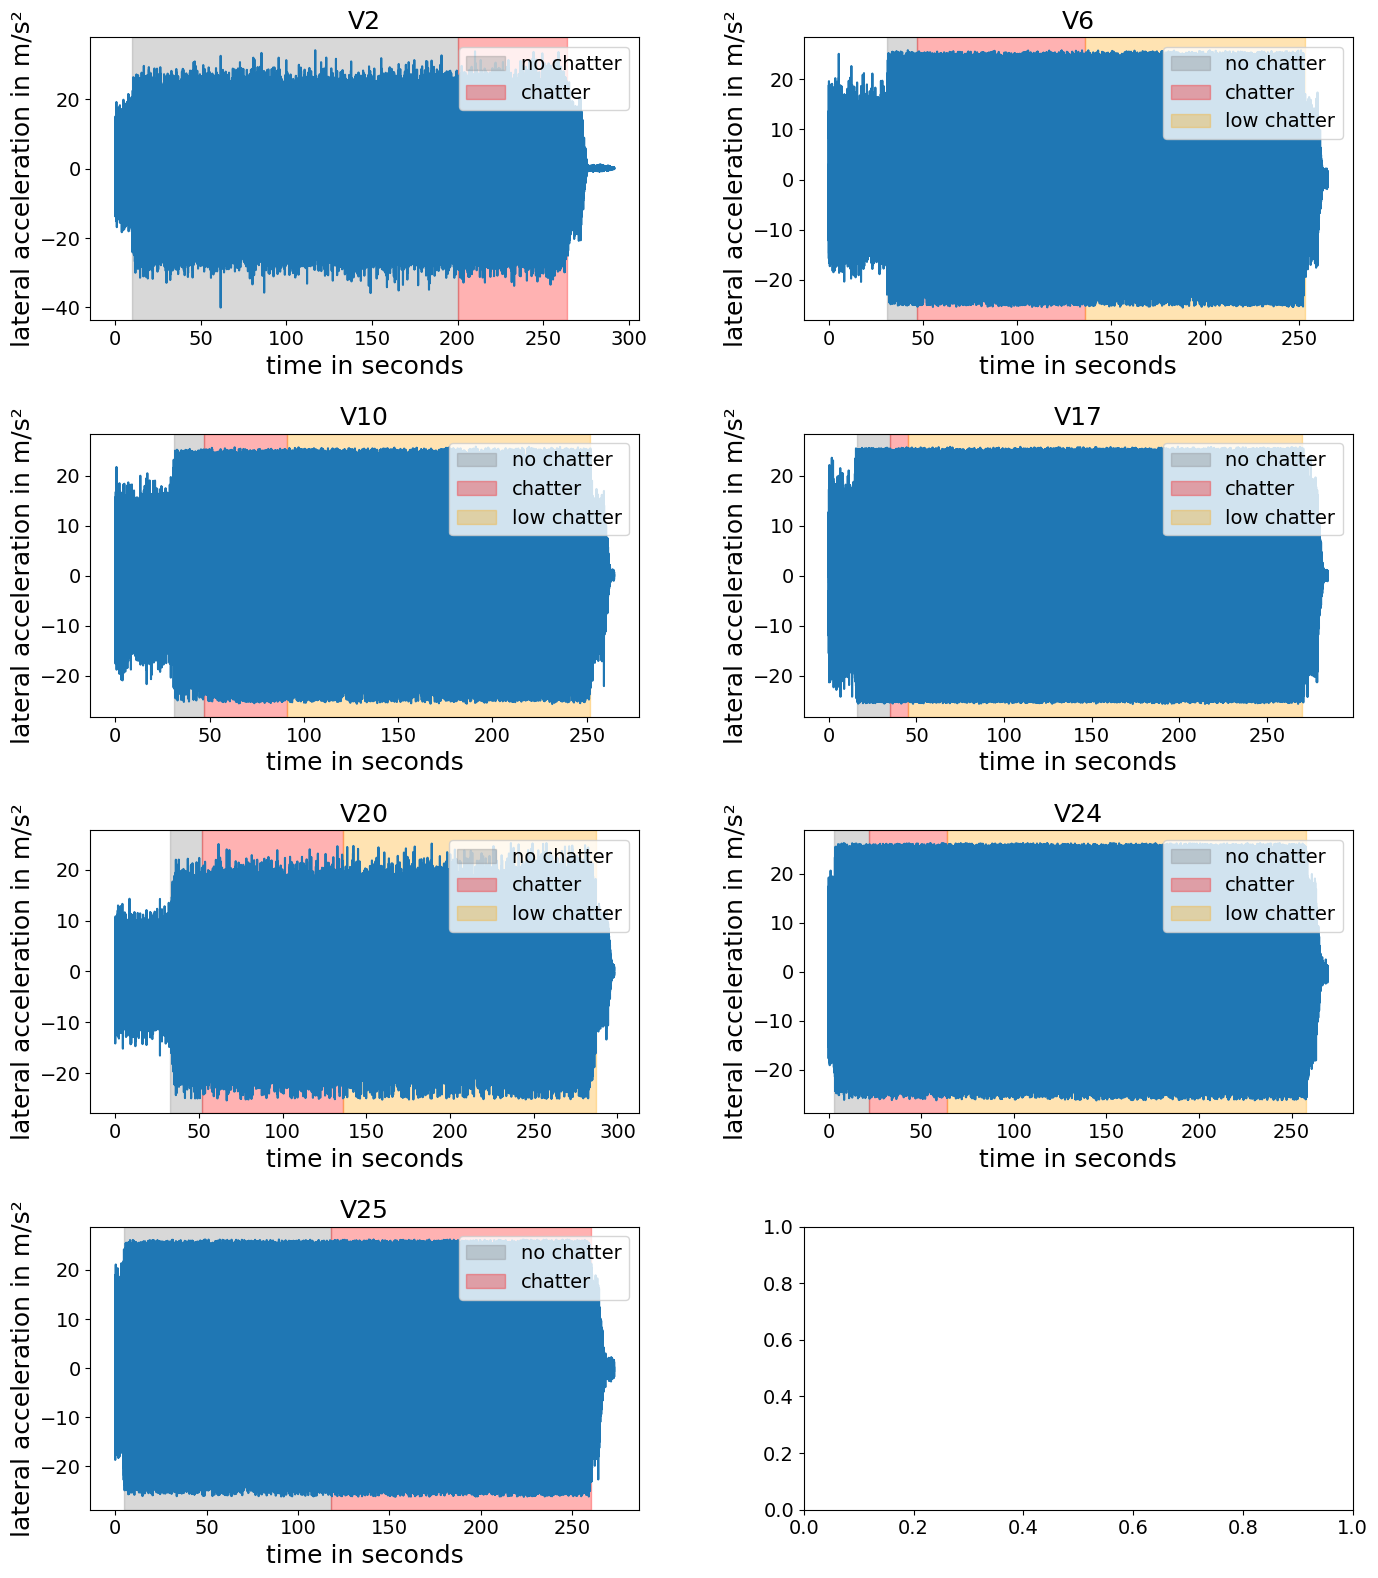

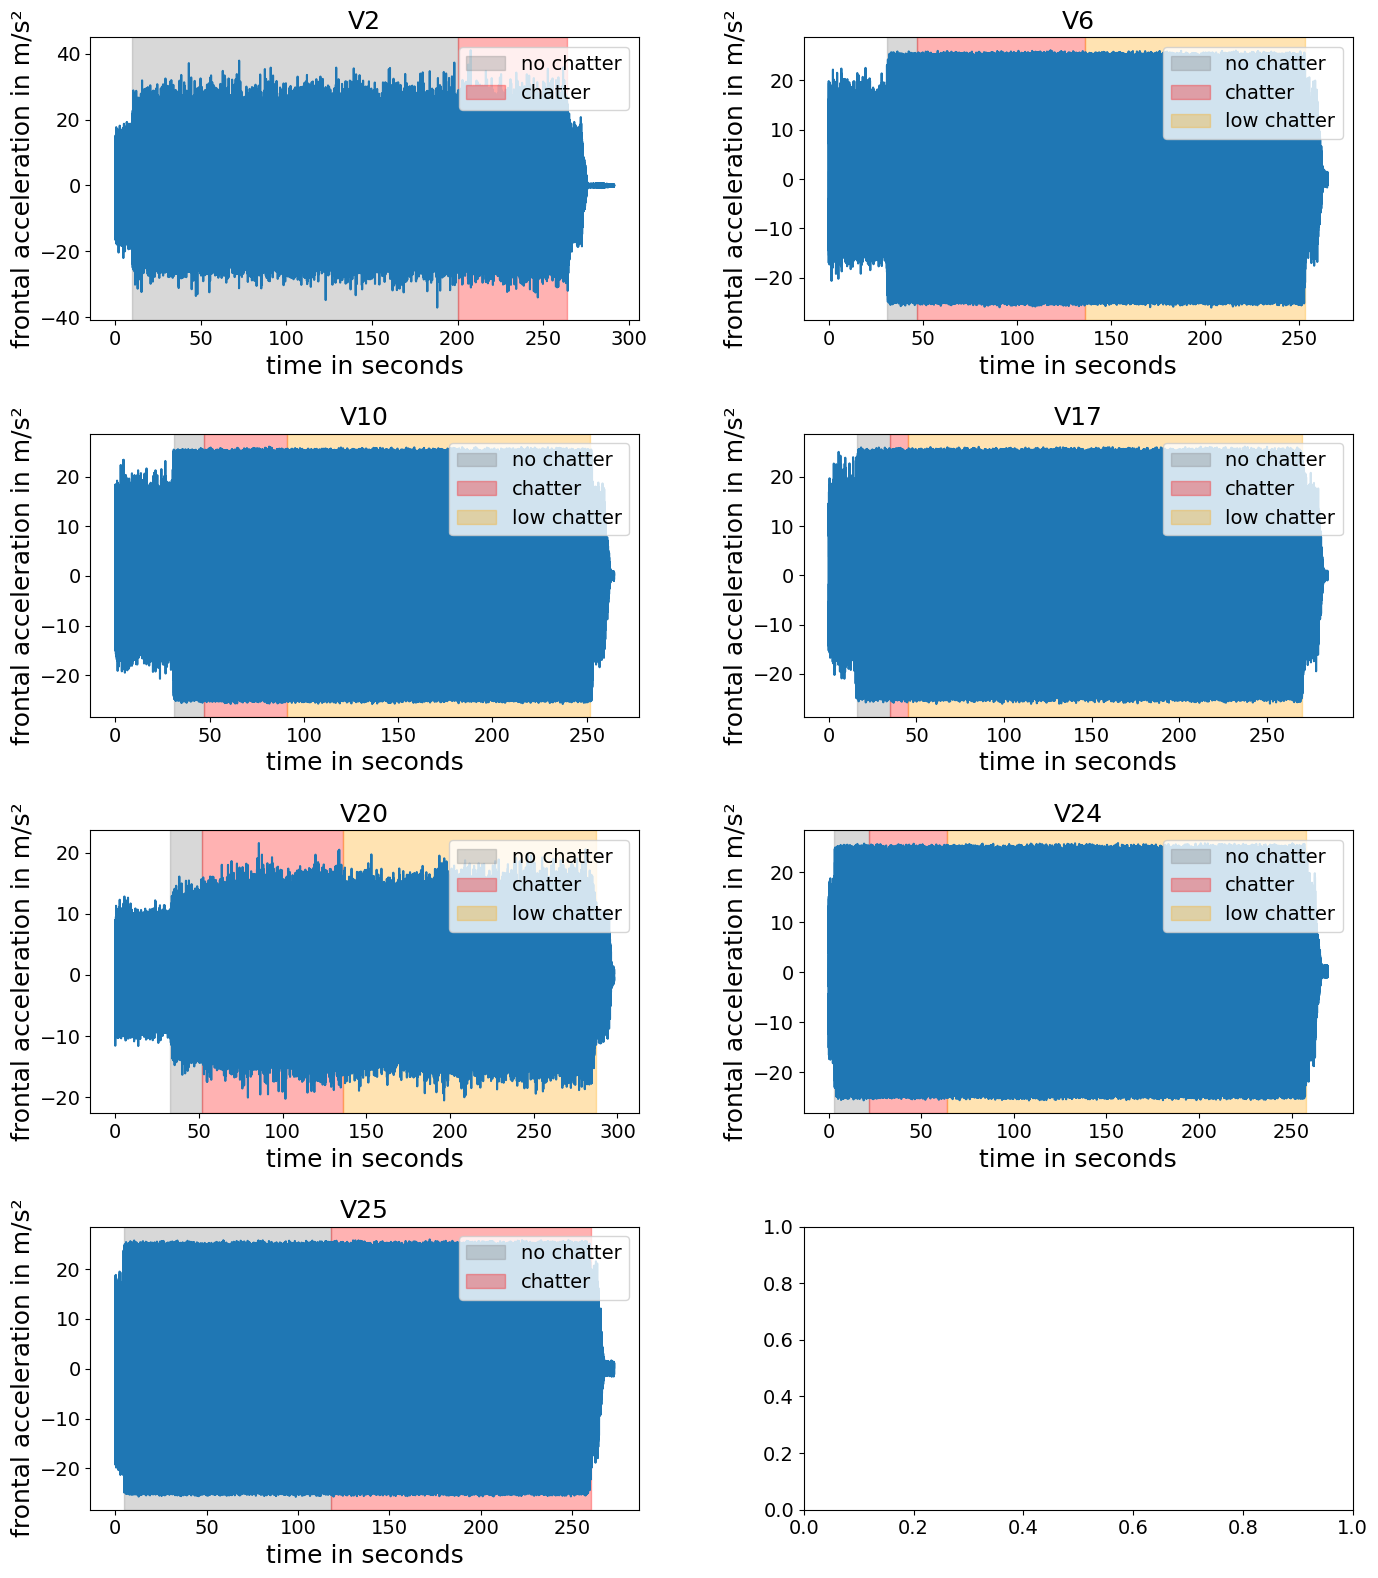

In [47]:
def plot_all_v_time_series_with_segments(column: str, y_label: str):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16), constrained_layout=True)
    df_by_idx = { (0,0): "v2", (0,1): "v6", (1,0): "v10", (1,1): "v17", (2,0): "v20", (2,1): "v24", (3,0): "v25"}
    for (y,x) in df_by_idx:
        df_name = df_by_idx[(y,x)]
        df = dfs[df_name]
        ax: Axes = axes[y,x]
        ax.plot(df["seconds"], df[column])
        ax.set_title(df_name.upper(), fontsize=18)
        ax.set_xlabel("time in seconds", fontsize=18)
        ax.set_ylabel(y_label, fontsize=18)
        add_regions(df_name, fig, ax)
        ax.legend(loc="upper right")
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3, hspace=0.40)
    plt.savefig(f"plots/all-{column}.png")
    plt.show()
# manually remove last plot!!!
plot_all_v_time_series_with_segments("lateral acceleration", "lateral acceleration in m/s²")
plot_all_v_time_series_with_segments("frontal acceleration", "frontal acceleration in m/s²")

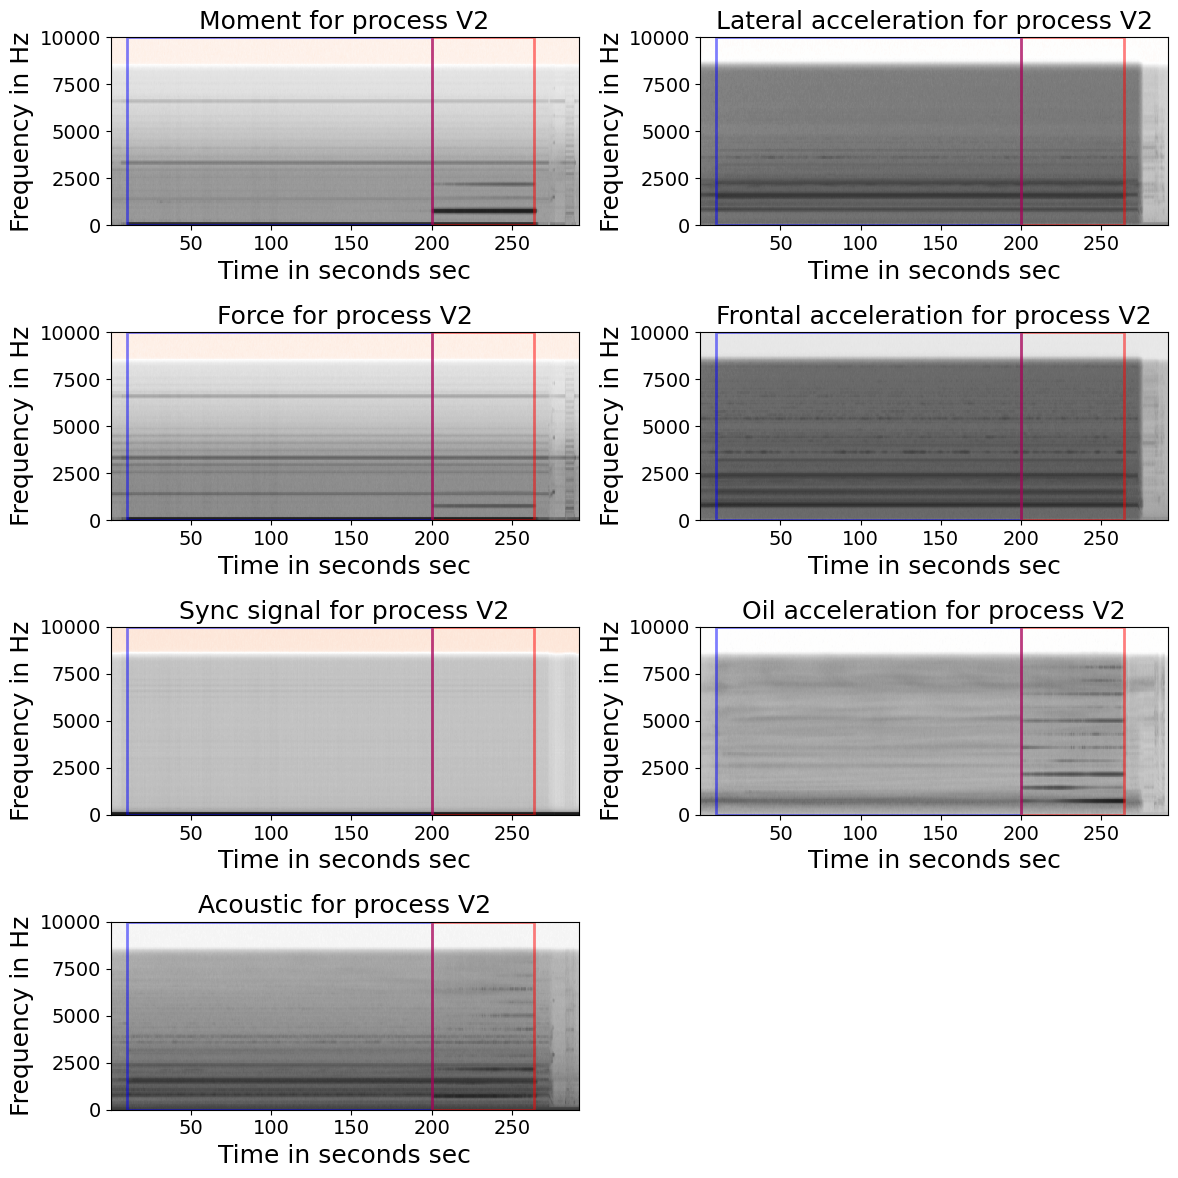

In [78]:
def add_regions_2(df_name, fig: Figure, ax: Axes):
    reg: list[(str, int, int)] = regions[df_name]
    for (name, start, end) in reg:
        color =  {"chatter": "red", "low chatter": "orange", "no chatter": "blue"}[name]
        ax.axvspan(start, end, alpha=0.5, label=name, facecolor="none", edgecolor=color, linewidth=2)


# Create a figure and subplots
def plot_seven_spec_at_once(df_name: str,  sampling_rate: int=4000):
  
  
  df: pl.DataFrame = dfs[df_name]
  fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
  # Plot the subplots
  cols = list(df.columns)
  idx = 1
  
  for j in [0,1]:
    for i in [0,1,2,3]:
      if idx < 8:
        ax: Axes = axes[i, j]
        colname = cols[idx].capitalize()
        df_name_upper = df_name.upper()
        ax.set_title(f"{colname} for process {df_name_upper}", fontsize=18)
        
        ax.specgram(df[cols[idx]], Fs=sampling_rate, mode='psd', cmap="RdGy")
        ax.set_xlabel('Time in seconds sec', fontsize=18)
        ax.set_ylabel('Frequency in Hz', fontsize=18)
        add_regions_2(df_name, fig, ax)
        idx = idx + 1

  # delete the last axis
  fig.delaxes(axes[3,1])
  # fig.suptitle(title, fontsize=18)

  # Adjust the spacing between subplots
  fig.tight_layout()

  plt.savefig(f"plots/{df_name}-spec.png")
  plt.show()

plot_seven_spec_at_once("v2", sampling_rate=20000)

In [ ]:
# Create a figure and subplots
def plot_seven_spec_at_once(df_name: str,  sampling_rate: int=4000):
  
  df: pl.DataFrame = dfs[df_name]
  fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
  # Plot the subplots
  cols = list(df.columns)
  idx = 1
  
  for j in [0,1]:
    for i in [0,1,2,3]:
      if idx < 8:
        ax: Axes = axes[i, j]
        colname = cols[idx].capitalize()
        df_name_upper = df_name.upper()
        ax.set_title(f"{colname} for process {df_name_upper}", fontsize=18)
        
        ax.specgram(df[cols[idx]], Fs=sampling_rate, mode='psd', cmap="RdGy")
        ax.set_xlabel('Time in seconds sec', fontsize=18)
        ax.set_ylabel('Frequency in Hz', fontsize=18)
        add_regions_2(df_name, fig, ax)
        idx = idx + 1

  # delete the last axis
  fig.delaxes(axes[3,1])
  # fig.suptitle(title, fontsize=18)

  # Adjust the spacing between subplots
  fig.tight_layout()

  plt.savefig(f"plots/{df_name}-spec.png")
  plt.show()

plot_seven_spec_at_once("v2", sampling_rate=20000)

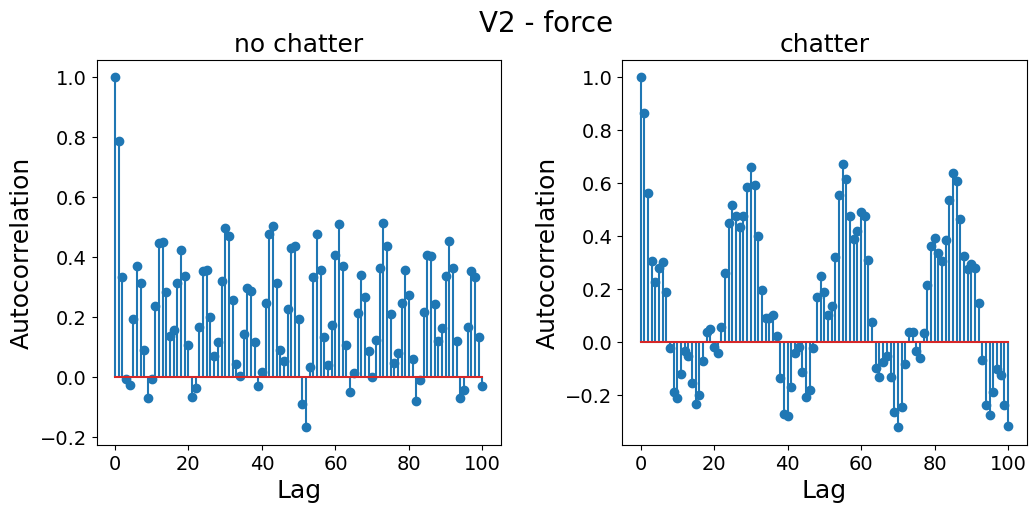

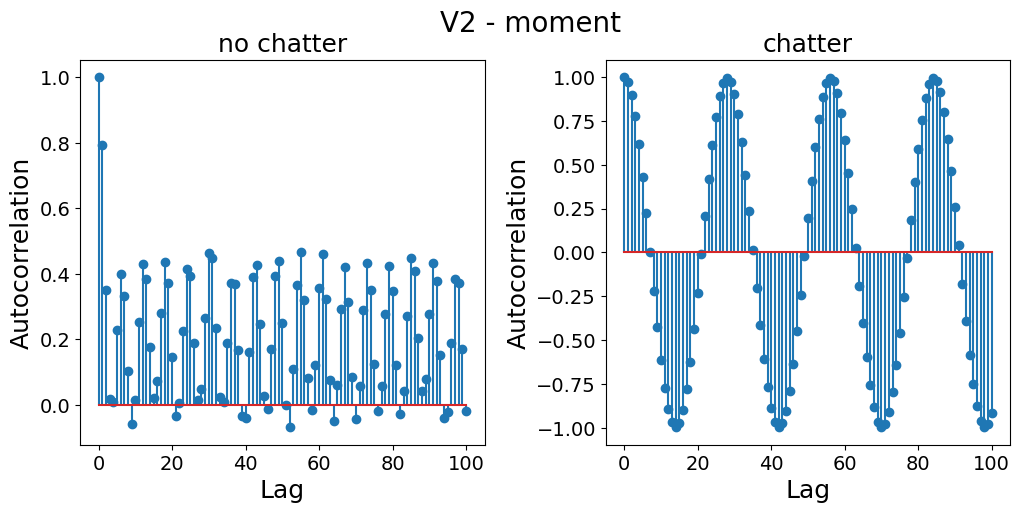

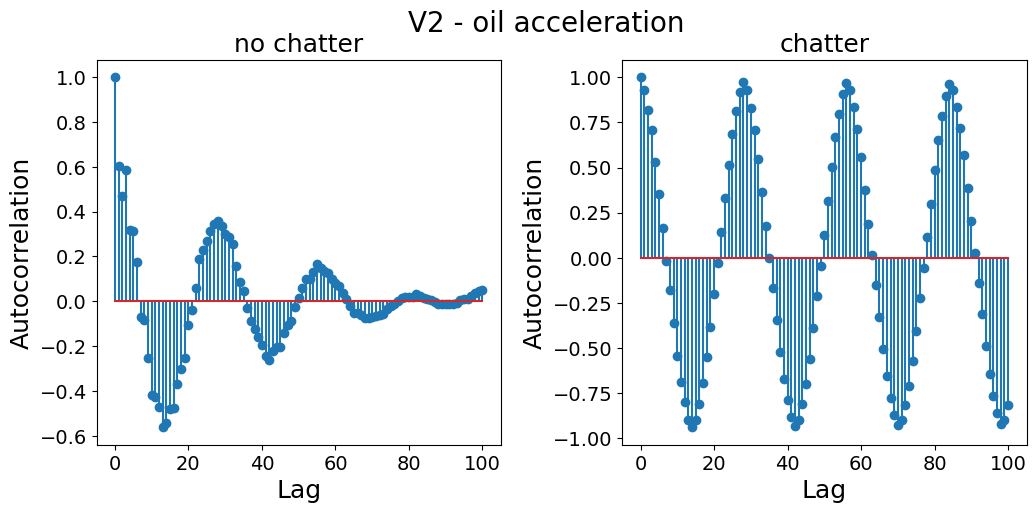

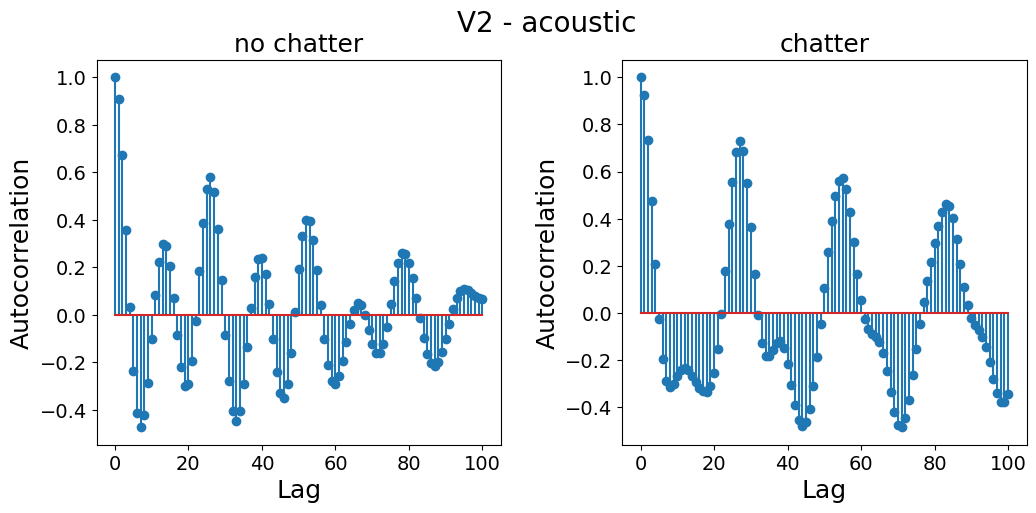

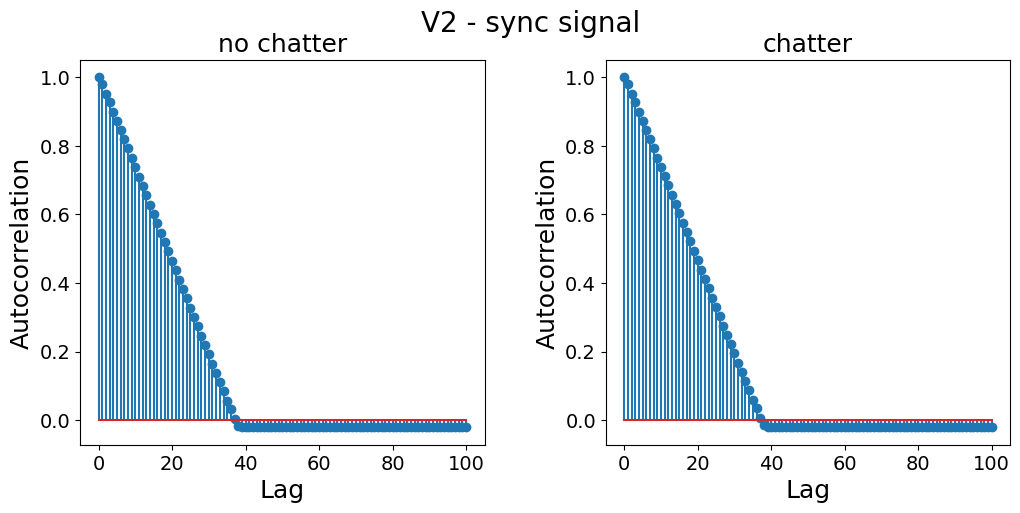

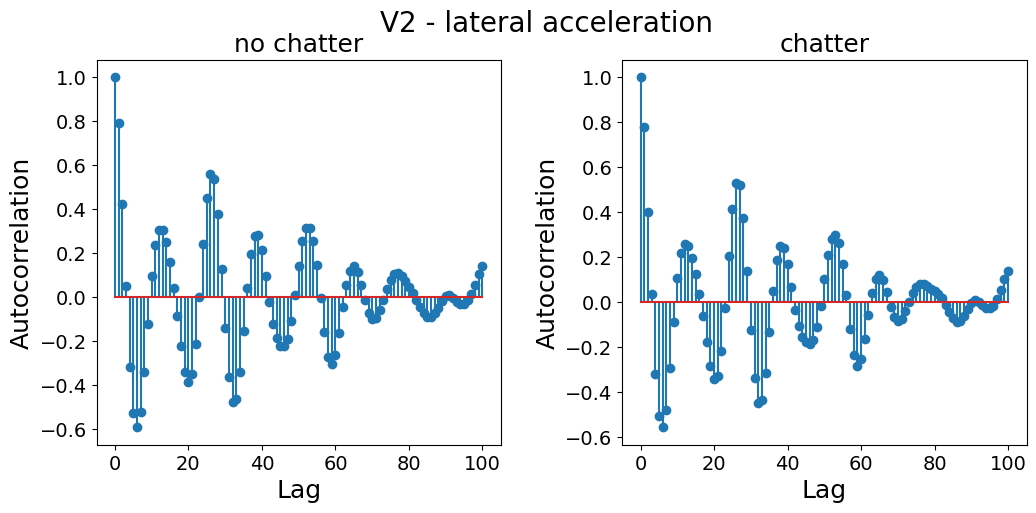

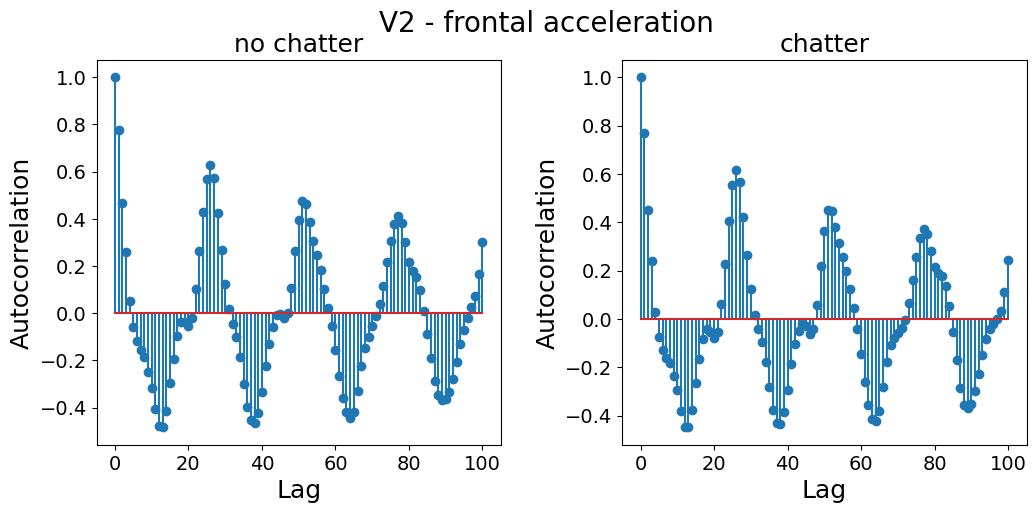

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


def plot_acf_for_region(df: pl.DataFrame, column: str, start_sec: float, end_sec: float, ax: Axes, title: str = None):
    acf = sm.tsa.stattools.acf(
        df[column][int(20000*start_sec):int(20000*end_sec)], nlags=100)
    ax.set_xlabel('Lag', fontsize=18)
    ax.set_ylabel('Autocorrelation', fontsize=18)
    ax.set_title(title, fontsize=18)
    ax.stem(acf)

def plot_acfs_chatter_vs_non_chatter(df_name: str, column: str):
    df = dfs[df_name]
    (_, r1start, r1end) = regions[df_name][0]
    (_, r2start, r2end) = regions[df_name][1]
    fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
    plot_acf_for_region(df, column, r1start, r1end, axes[0], title="no chatter")
    plot_acf_for_region(df, column, r2start, r2end, axes[1], title="chatter")
    plt.suptitle(f"{df_name.upper()} - {column}", fontsize=20)
    plt.subplots_adjust(wspace=0.3)
    plt.savefig(f"plots/{df_name}-{column}-acfs.png")
    plt.show()

v_columns = ["force", "moment", "oil acceleration", "acoustic", "sync signal", "lateral acceleration", "frontal acceleration"]
for col in v_columns:
    plot_acfs_chatter_vs_non_chatter("v2", col)


# calculate the AACF values for time windows of 1000

the resulting dataframe should be 1/1000 the length of the original dataframe but with similar columns

In [129]:
LAGS = 100
TIME_INTERVAL = 1000
TIME_FRAME = 1000


def aacf(series: pl.Series) -> float:
    acf = sm.tsa.stattools.acf(series, nlags=LAGS)
    res = np.sum(np.abs(acf))
    return res

def acf_transform_series(series: pl.Series) -> pl.Series:
    print(series.len())
    vec = []
    for i in range(TIME_FRAME, series.len()-TIME_FRAME, TIME_INTERVAL):
        vec.append(aacf(series[(i-TIME_FRAME):i]))
    return pl.Series(vec)

def time_and_seconds_for_acfs(df: pl.DataFrame):
    times = []
    seconds = []
    for i in range(TIME_FRAME, df["time"].len()-TIME_FRAME, TIME_INTERVAL):
        times.append(df["time"][i])
        seconds.append(df["seconds"][i])
    return {"time": times, "seconds": seconds}



In [130]:

all_columns = set(rename_d_columns.values()).union(set(rename_v_columns.values()))

dfs_acfs = {}

for name in dfs:
    df = dfs[name]
    data = time_and_seconds_for_acfs(df)
    for col in all_columns:
        try:
            series = df[col]
            series_acfs = acf_transform_series(series)
            data[col] = series_acfs
        except:
            pass
    dfs_acfs[name] = pl.DataFrame(data)
# takes about 2 minutes

4688582
4688582
4688582
4688582
4688582
4688582
4688582
5369767
5369767
5369767
5369767
5369767
5369767
5369767
5349176
5349176
5349176
5349176
5349176
5349176
5349176
5829936
5829936
5829936
5829936
5829936
5829936
5829936
5301441
5301441
5301441
5301441
5301441
5301441
5301441
5290814
5290814
5290814
5290814
5290814
5290814
5290814
5689690
5689690
5689690
5689690
5689690
5689690
5689690
5960281
5960281
5960281
5960281
5960281
5960281
5960281
5389292
5389292
5389292
5389292
5389292
5389292
5389292
5457655
5457655
5457655
5457655
5457655
5457655
5457655


['oil acceleration', 'sync signal', 'force', 'bohrst', 'acoustic', 'moment', 'bending moment']


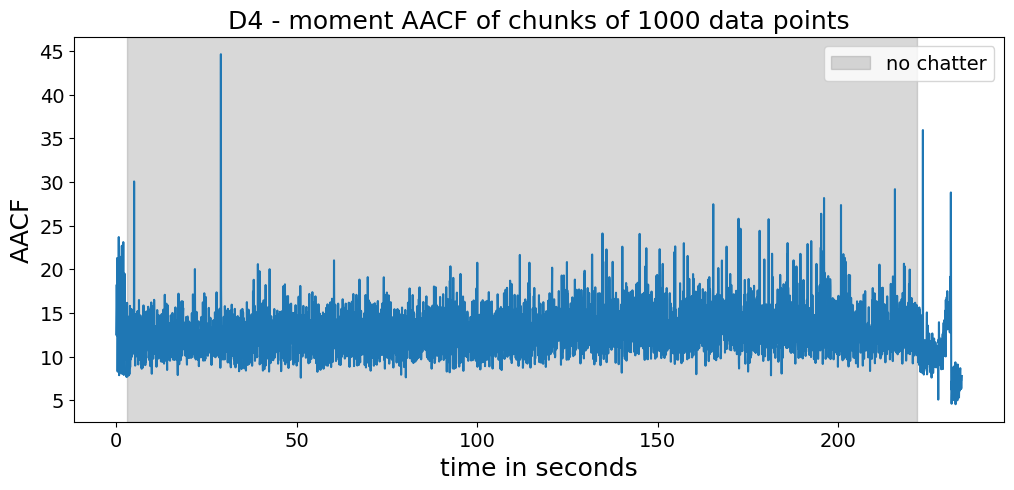

['oil acceleration', 'sync signal', 'force', 'bohrst', 'acoustic', 'moment', 'bending moment']


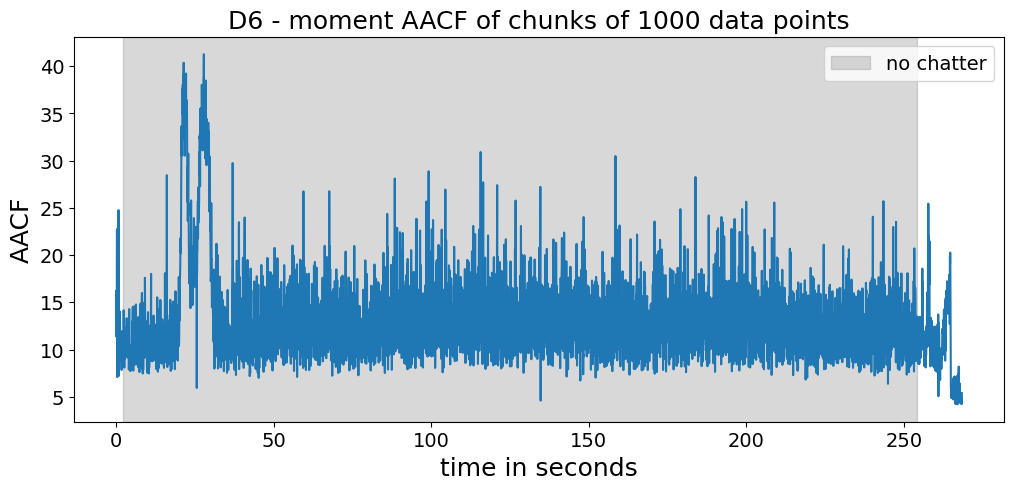

['oil acceleration', 'sync signal', 'force', 'bohrst', 'acoustic', 'moment', 'bending moment']


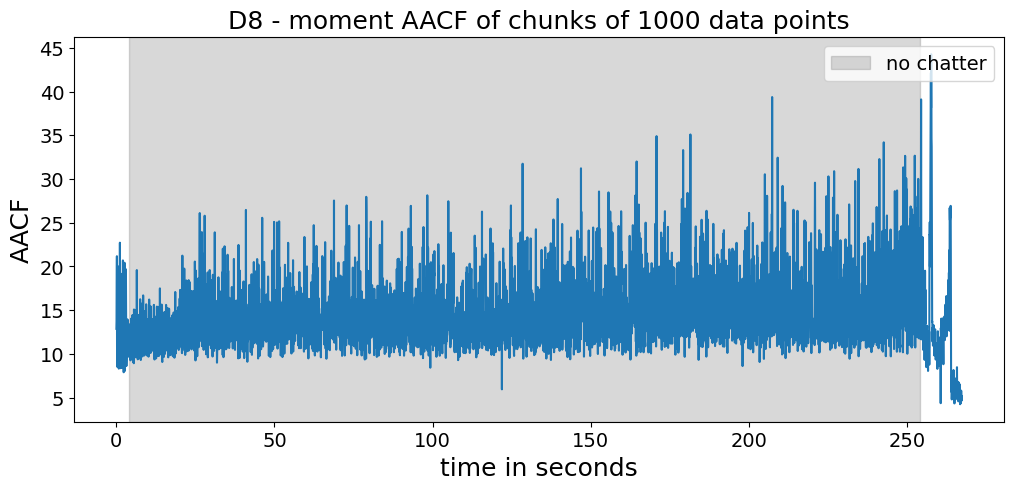

['oil acceleration', 'sync signal', 'lateral acceleration', 'force', 'acoustic', 'frontal acceleration', 'moment']


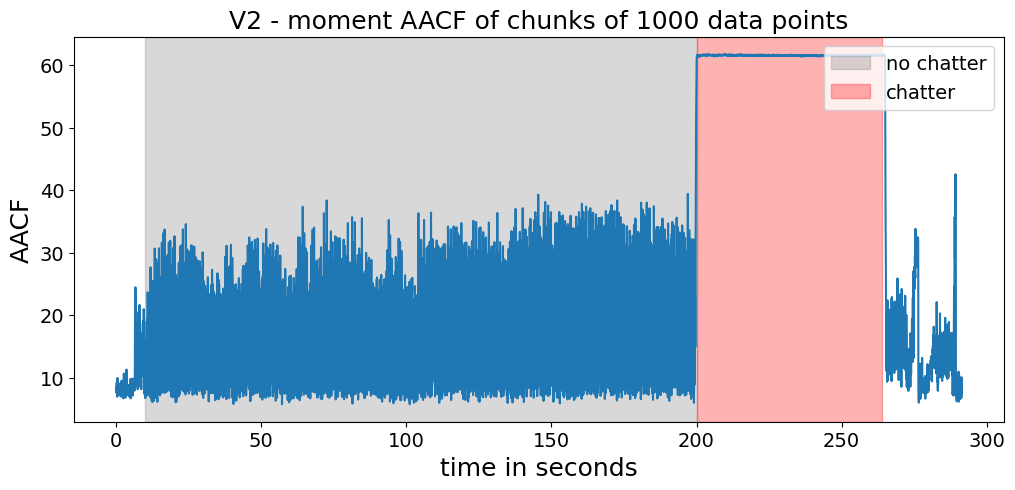

['oil acceleration', 'sync signal', 'lateral acceleration', 'force', 'acoustic', 'frontal acceleration', 'moment']


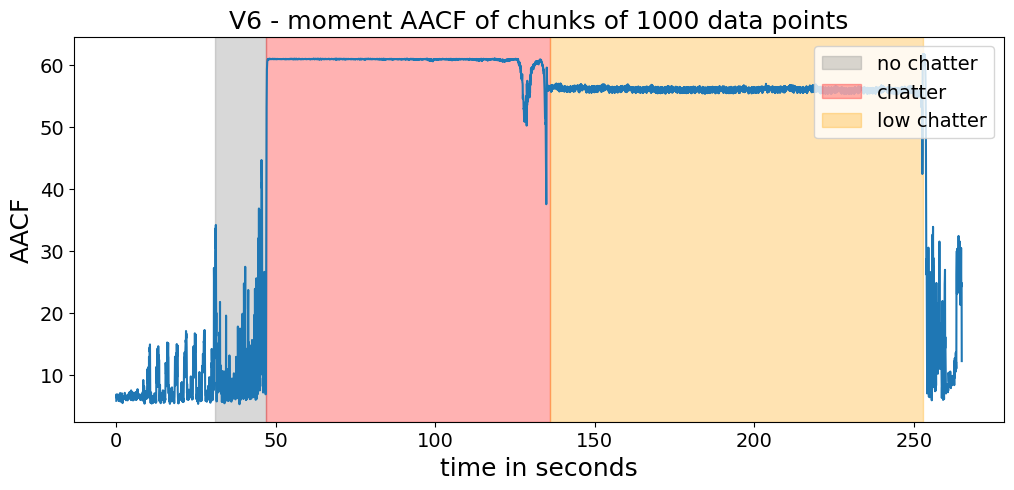

['oil acceleration', 'sync signal', 'lateral acceleration', 'force', 'acoustic', 'frontal acceleration', 'moment']


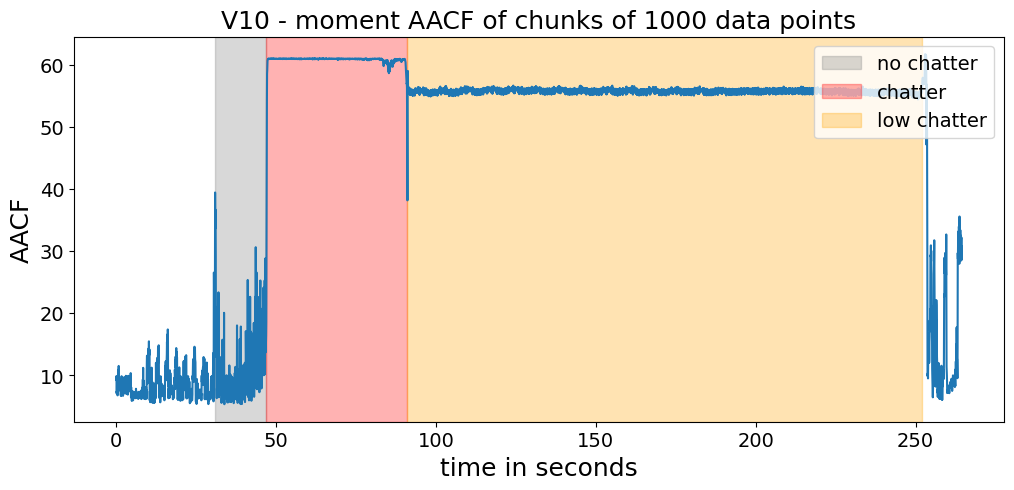

['oil acceleration', 'sync signal', 'lateral acceleration', 'force', 'acoustic', 'frontal acceleration', 'moment']


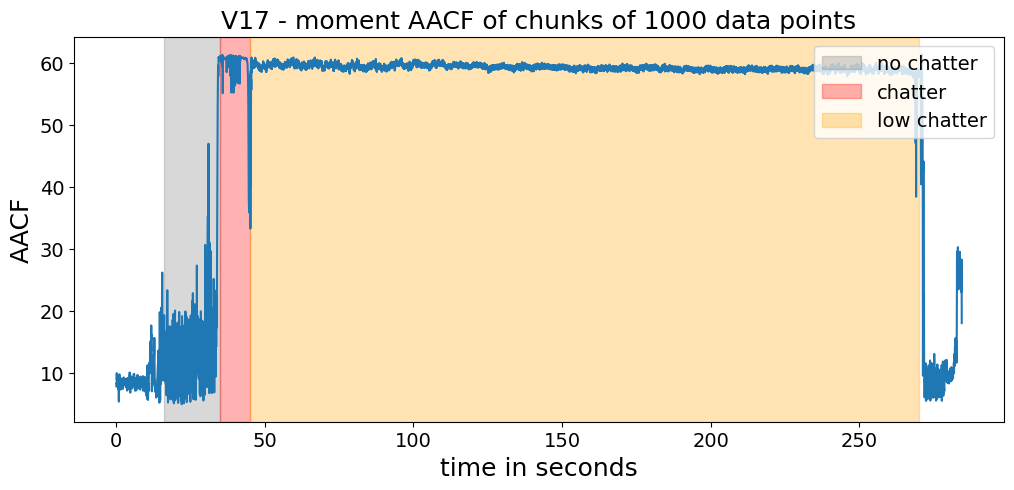

['oil acceleration', 'sync signal', 'lateral acceleration', 'force', 'acoustic', 'frontal acceleration', 'moment']


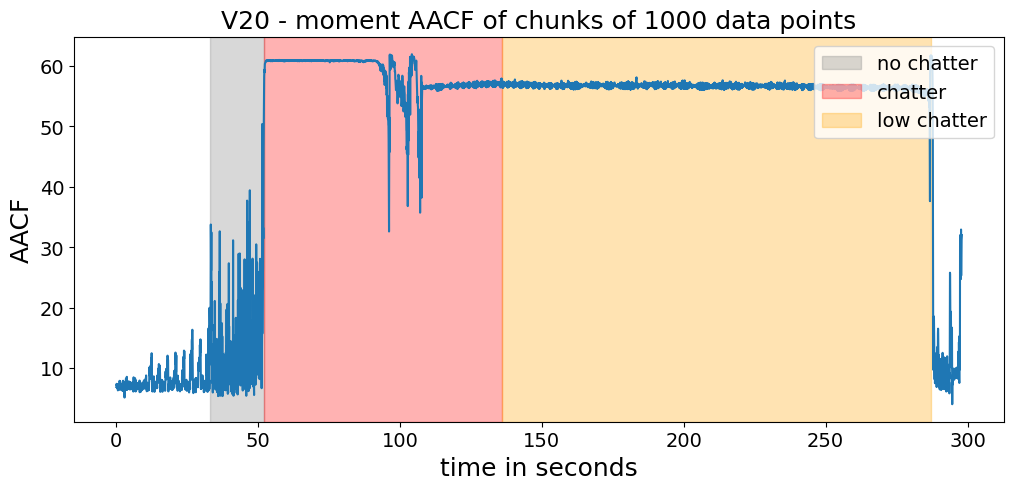

['oil acceleration', 'sync signal', 'lateral acceleration', 'force', 'acoustic', 'frontal acceleration', 'moment']


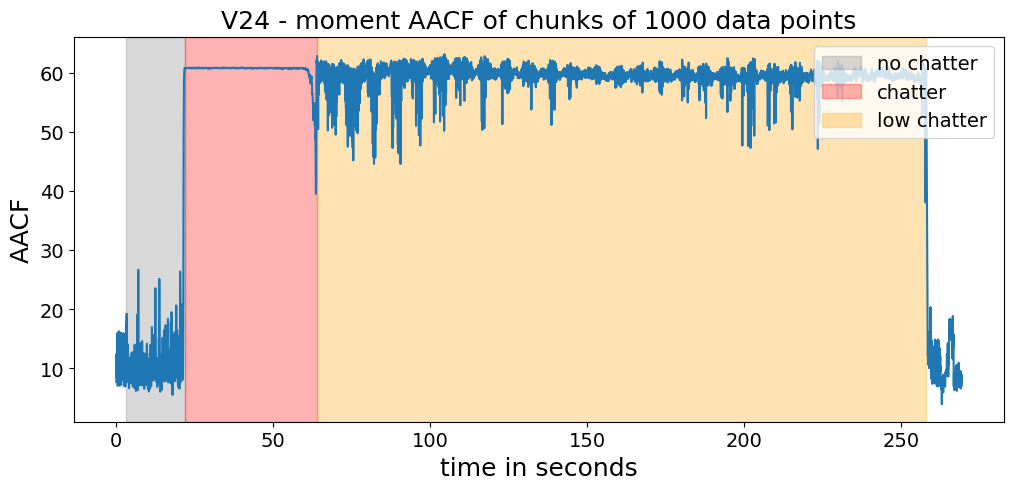

['oil acceleration', 'sync signal', 'lateral acceleration', 'force', 'acoustic', 'frontal acceleration', 'moment']


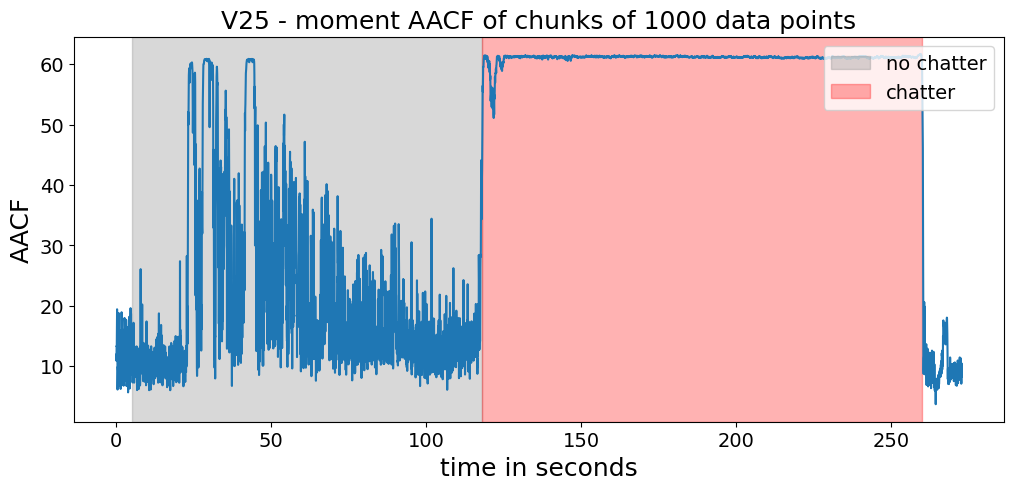

['plots/d4-moment-aacf.png', 'plots/d6-moment-aacf.png', 'plots/d8-moment-aacf.png', 'plots/v2-moment-aacf.png', 'plots/v6-moment-aacf.png', 'plots/v10-moment-aacf.png', 'plots/v17-moment-aacf.png', 'plots/v20-moment-aacf.png', 'plots/v24-moment-aacf.png', 'plots/v25-moment-aacf.png']


In [152]:
filenames = []
for name in dfs_acfs:
    df = dfs_acfs[name]
    # get list of all colmns in df that are also in all_columns
    columns = list(set(df.columns).intersection(all_columns))
    print(columns)
    columns = ["moment"] # for testing
    for col in columns:
        fig, ax = plt.subplots(figsize=(12, 5))
        ax.plot(df["seconds"], df[col])
        ax.set_xlabel("time in seconds", fontsize=18)
        ax.set_ylabel("AACF", fontsize=18)
        ax.set_title(f"{name.upper()} - {col} AACF of chunks of 1000 data points", fontsize=18)
        add_regions(name, fig, ax)
        plt.legend(loc="upper right")
        plt.savefig(f"plots/{name}-{col}-aacf.png")
        filenames.append(f"plots/{name}-{col}-aacf.png")
        plt.show()
print(filenames)       


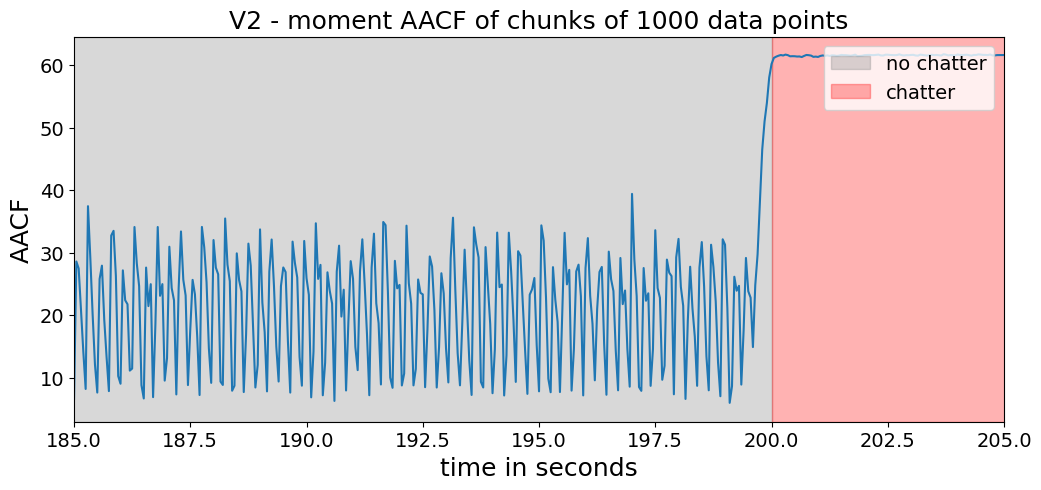

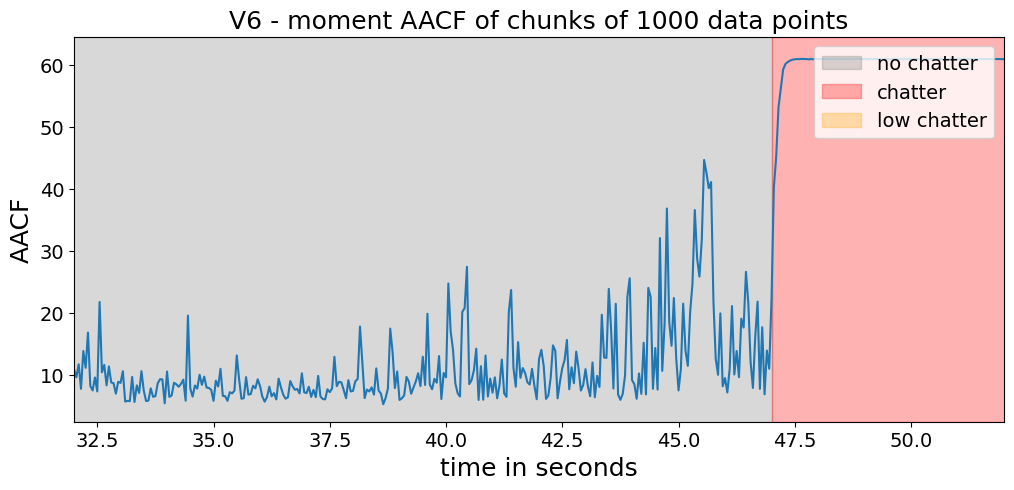

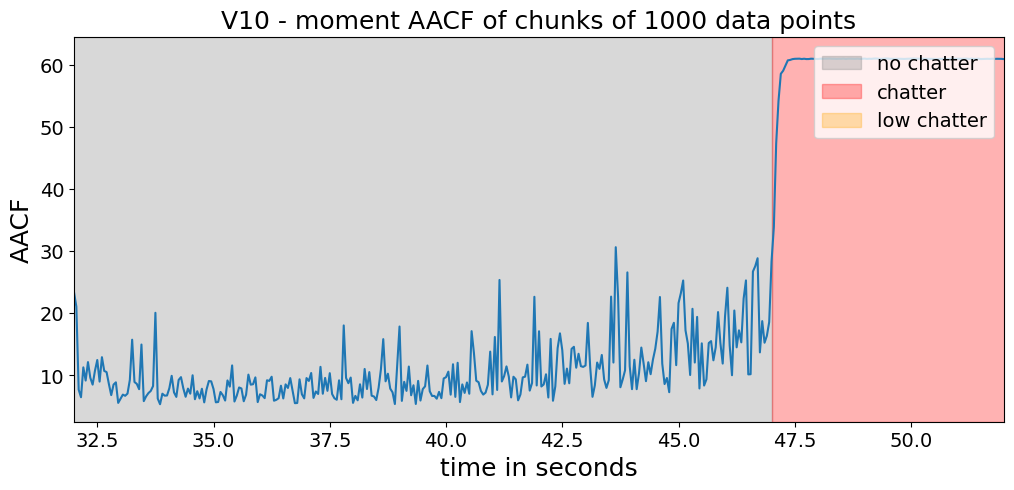

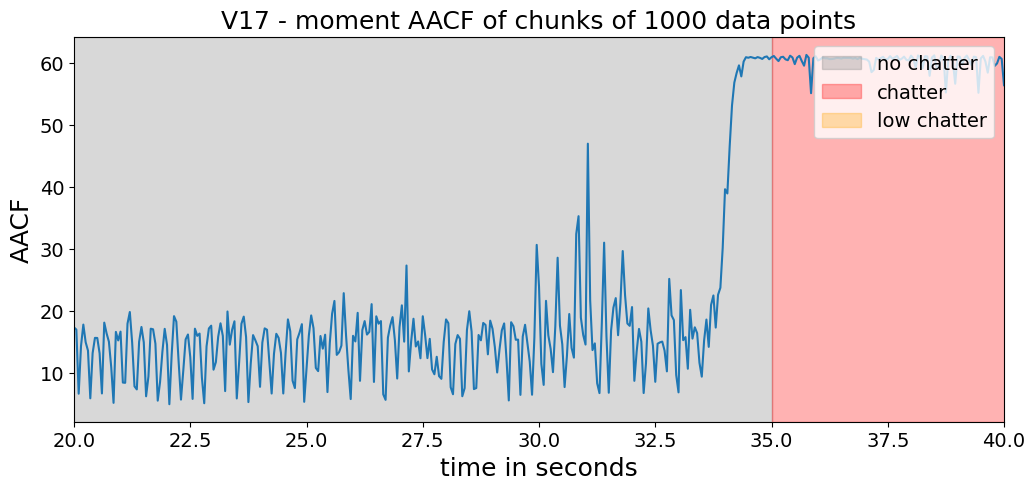

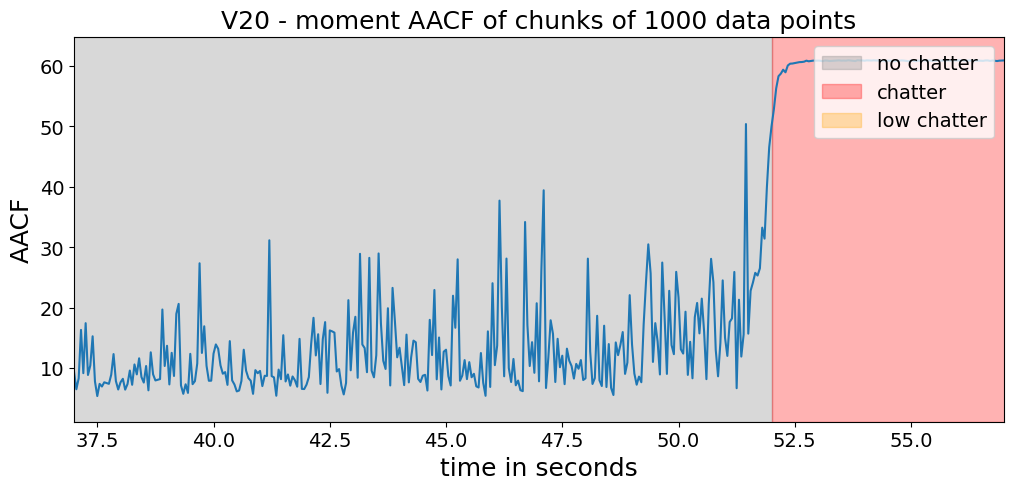

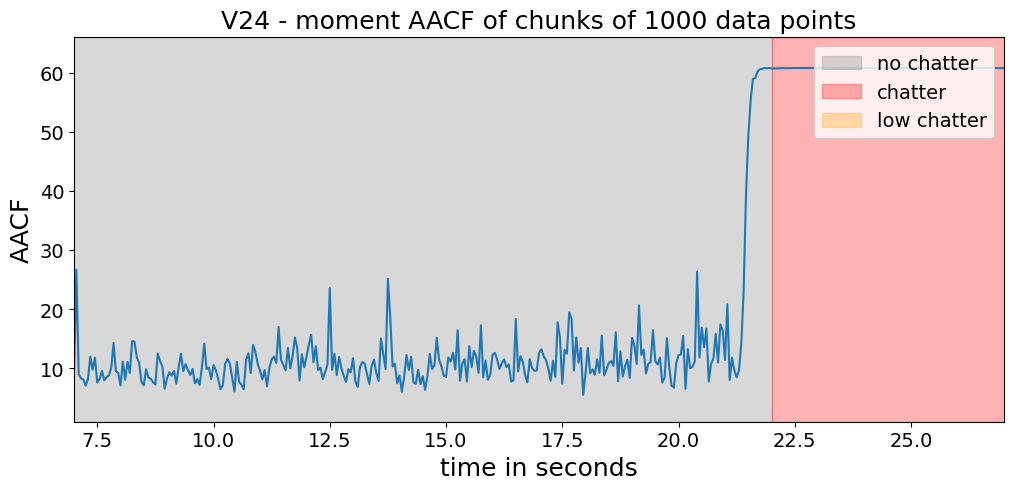

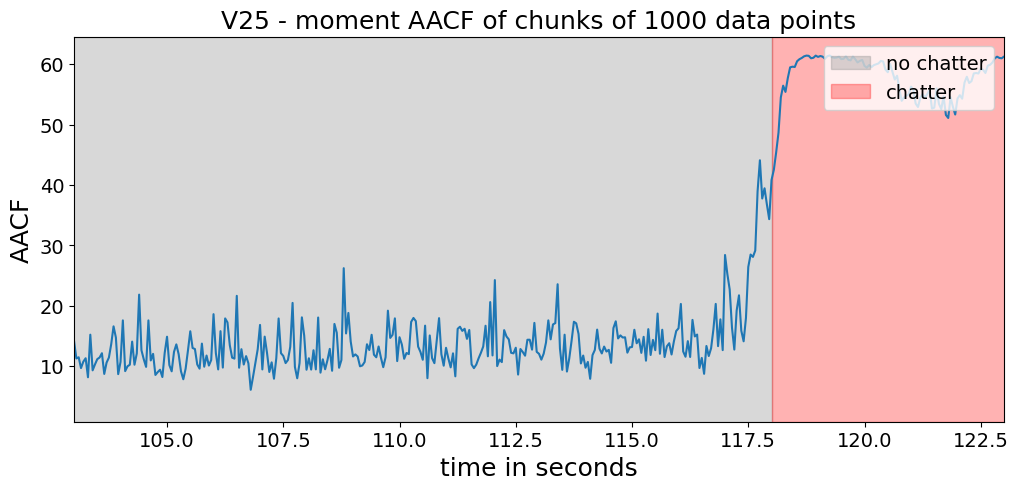

 v2  & 199.85000610351562  & -0.149993896484375  
 v6  & 47.150001525878906  & 0.15000152587890625  
 v10  & 47.150001525878906  & 0.15000152587890625  
 v17  & 34.150001525878906  & -0.8499984741210938  
 v20  & 51.45000076293945  & -0.5499992370605469  
 v24  & 21.549999237060547  & -0.4500007629394531  
 v25  & 23.25  & -94.75  



In [162]:

tablediff = ""
# do the same printing again but with zoom in on the chatter start:
for name in dfs_acfs:
    df = dfs_acfs[name]
    # get list of all colmns in df that are also in all_columns
    col = 'moment'
    if name[0] == "d":
        continue

    (_, r1start, r1end) = regions[name][0]
    (_, r2start, r2end) = regions[name][1]
    fig, ax = plt.subplots(figsize=(12, 5))


    for (s, val) in zip(df["seconds"], df[col]):
        if val > 50:
            diff = s - r2start
            tablediff += f" {name}  & {s}  & {diff}  \n"
            print()
            break

    ax.plot(df["seconds"], df[col])
    ax.set_xlabel("time in seconds", fontsize=18)
    ax.set_ylabel("AACF", fontsize=18)
    ax.set_title(f"{name.upper()} - {col} AACF of chunks of 1000 data points", fontsize=18)
    add_regions(name, fig, ax)
    plt.legend(loc="upper right")
    plt.xlim(r1end-15, r1end+5)
    plt.savefig(f"plots/{name}-{col}-close-aacf.png")
    plt.show()   


print(tablediff)

create a table with the AACF for each process in chatter phase and before

In [142]:
for name in dfs:
    (_, r1start, r1end) = regions[name][0]
    r1aacfs = dfs_acfs[name]["moment"][(r1start*20):(r1end*20)]
    r2aacfs = pl.Series([0])
    if regions[name].__len__() > 1:
        (_, r2start, r2end) = regions[name][1]
        r2aacfs = dfs_acfs[name]["moment"][(r2start*20):(r2end*20)]
    min1, max1, mean1, std1, count1 = r1aacfs.min(), r1aacfs.max(), r1aacfs.mean(), r1aacfs.std(), r1aacfs.len()
    min2, max2, mean2, std2, count2 = r2aacfs.min(), r2aacfs.max(), r2aacfs.mean(), r2aacfs.std(), r2aacfs.len()
    print(f"{name} non chatter chunk count:     {count1}    chatter chunk count:   {count2}")
    # print(f"{name}       &        {mean1:0.2f}      &      {mean2:0.2f}      &       {std1:0.2f}       &      {std2:0.2f}      &     {min1:0.2f}      &      {min2:0.2f}   &  {max1:0.2f}   &  {max2:0.2f}")
    

d4 non chatter chunk count:     4380    chatter chunk count:   1
d6 non chatter chunk count:     5040    chatter chunk count:   1
d8 non chatter chunk count:     5000    chatter chunk count:   1
v2 non chatter chunk count:     3800    chatter chunk count:   1280
v6 non chatter chunk count:     320    chatter chunk count:   1780
v10 non chatter chunk count:     320    chatter chunk count:   880
v17 non chatter chunk count:     380    chatter chunk count:   200
v20 non chatter chunk count:     380    chatter chunk count:   1680
v24 non chatter chunk count:     380    chatter chunk count:   840
v25 non chatter chunk count:     2260    chatter chunk count:   2840


In [ ]:
# from scipy import signal

# frequencies, spectrum = signal.periodogram(
#     v2["CH4_akustik"][20000*200: 20000*260], 10000)

# # Plot the periodogram
# plt.plot(frequencies, spectrum)
# plt.xlabel('Frequency')
# plt.ylabel('Power Spectral Density')
# plt.title('Periodogram of Time Series')
# plt.show()